In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
# Stock symbols
stocks = ["AGI.NS", "DABUR.NS", "DRREDDY.NS", "HINDUNILVR.NS", "NESTLEIND.NS", "SUNPHARMA.NS","GLAXO.NS"]

# Create a DataFrame for each stock
df_agi = yf.Ticker("AGI.NS").history(period="max")
df_dabur = yf.Ticker("DABUR.NS").history(period="max")
df_drreddy = yf.Ticker("DRREDDY.NS").history(period="max")
df_hindunilvr = yf.Ticker("HINDUNILVR.NS").history(period="max")
df_nestleind = yf.Ticker("NESTLEIND.NS").history(period="max")
df_sunpharma = yf.Ticker("SUNPHARMA.NS").history(period="max")


In [104]:
# Assuming df_agi, df_dabur, ..., df_sunpharma are your dataframes

# Extracting the first and last index from each DataFrame
start_dates = [df.index[0] for df in [df_agi, df_dabur, df_drreddy, df_hindunilvr, df_nestleind, df_sunpharma]]
end_dates = [df.index[-1] for df in [df_agi, df_dabur, df_drreddy, df_hindunilvr, df_nestleind, df_sunpharma]]

# Finding the latest start date and the earliest end date
latest_start_date = max(start_dates)
earliest_end_date = min(end_dates)

print(f"Latest common start date: {latest_start_date}")
print(f"Earliest common end date: {earliest_end_date}")


Latest common start date: 2002-08-12 00:00:00+05:30
Earliest common end date: 2023-12-22 00:00:00+05:30


In [105]:
# Assuming df_agi, df_dabur, ..., df_sunpharma are your dataframes
# Assuming latest_start_date and earliest_end_date are already defined as shown

# Filter each DataFrame for the common date range
df_agi_filtered = df_agi.loc[latest_start_date:earliest_end_date]
df_dabur_filtered = df_dabur.loc[latest_start_date:earliest_end_date]
df_drreddy_filtered = df_drreddy.loc[latest_start_date:earliest_end_date]
df_hindunilvr_filtered = df_hindunilvr.loc[latest_start_date:earliest_end_date]
df_nestleind_filtered = df_nestleind.loc[latest_start_date:earliest_end_date]
df_sunpharma_filtered = df_sunpharma.loc[latest_start_date:earliest_end_date]

# Now, each of these filtered DataFrames contains data only within the common date range.


In [107]:
# Renaming columns for merging
df_agi_filtered.columns = [f"AGI_{col}" for col in df_agi_filtered.columns]
df_dabur_filtered.columns = [f"DABUR_{col}" for col in df_dabur_filtered.columns]
df_drreddy_filtered.columns = [f"DRREDDY_{col}" for col in df_drreddy_filtered.columns]
df_hindunilvr_filtered.columns = [f"HINDUNILVR_{col}" for col in df_hindunilvr_filtered.columns]
df_nestleind_filtered.columns = [f"NESTLEIND_{col}" for col in df_nestleind_filtered.columns]
df_sunpharma_filtered.columns = [f"SUNPHARMA_{col}" for col in df_sunpharma_filtered.columns]

# Merging all dataframes on the Date index
merged_df = pd.concat([df_agi_filtered, df_dabur_filtered, df_drreddy_filtered, 
                       df_hindunilvr_filtered, df_nestleind_filtered, df_sunpharma_filtered], axis=1)

merged_df.head()  # Displaying the first few rows of the merged dataframe

AGI_AGI_Open  AGI_AGI_High  AGI_AGI_Low  \
Date                                                                 
2002-08-12 00:00:00+05:30      0.058234      0.059599     0.056301   
2002-08-13 00:00:00+05:30      0.057097      0.059826     0.057097   
2002-08-14 00:00:00+05:30      0.058917      0.058917     0.057324   
2002-08-15 00:00:00+05:30      0.058689      0.058689     0.058689   
2002-08-16 00:00:00+05:30      0.058803      0.058803     0.058120   

                           AGI_AGI_Close  AGI_AGI_Volume  AGI_AGI_Dividends  \
Date                                                                          
2002-08-12 00:00:00+05:30       0.056756            4345                0.0   
2002-08-13 00:00:00+05:30       0.058575             550                0.0   
2002-08-14 00:00:00+05:30       0.058689             814                0.0   
2002-08-15 00:00:00+05:30       0.058689               0                0.0   
2002-08-16 00:00:00+05:30       0.058120            2897                0.0   

                           AGI_AGI_Stock Splits  DABUR_DABUR_Open  \
Date                                                                
2002-08-12 00:00:00+05:30                   0.0          6.077694   
2002-08-13 00:00:00+05:30                   0.0          6.002522   
2002-08-14 00:00:00+05:30                   0.0          6.013798   
2002-08-15 00:00:00+05:30                   0.0          6.081453   
2002-08-16 00:00:00+05:30                   0.0          6.062660   

                           DABUR_DABUR_High  DABUR_DABUR_Low  ...  \
Date                                                          ...   
2002-08-12 00:00:00+05:30          6.107763         5.968694  ...   
2002-08-13 00:00:00+05:30          6.239315         5.968694  ...   
2002-08-14 00:00:00+05:30          6.137832         6.013798  ...   
2002-08-15 00:00:00+05:30          6.081453         6.081453  ...   
2002-08-16 00:00:00+05:30          6.137833         6.025074  ...   

                           NESTLEIND_NESTLEIND_Volume  \
Date                                                    
2002-08-12 00:00:00+05:30                        7100   
2002-08-13 00:00:00+05:30                        8800   
2002-08-14 00:00:00+05:30                       18700   
2002-08-15 00:00:00+05:30                           0   
2002-08-16 00:00:00+05:30                        9400   

                           NESTLEIND_NESTLEIND_Dividends  \
Date                                                       
2002-08-12 00:00:00+05:30                            0.0   
2002-08-13 00:00:00+05:30                            0.0   
2002-08-14 00:00:00+05:30                            0.0   
2002-08-15 00:00:00+05:30                            0.0   
2002-08-16 00:00:00+05:30                            0.0   

                           NESTLEIND_NESTLEIND_Stock Splits  \
Date                                                          
2002-08-12 00:00:00+05:30                               0.0   
2002-08-13 00:00:00+05:30                               0.0   
2002-08-14 00:00:00+05:30                               0.0   
2002-08-15 00:00:00+05:30                               0.0   
2002-08-16 00:00:00+05:30                               0.0   

                           SUNPHARMA_SUNPHARMA_Open  SUNPHARMA_SUNPHARMA_High  \
Date                                                                            
2002-08-12 00:00:00+05:30                 10.881410                 11.030198   
2002-08-13 00:00:00+05:30                 10.754444                 10.945886   
2002-08-14 00:00:00+05:30                 10.653266                 11.010359   
2002-08-15 00:00:00+05:30                 10.900255                 10.900255   
2002-08-16 00:00:00+05:30                 10.990521                 11.109552   

                           SUNPHARMA_SUNPHARMA_Low  SUNPHARMA_SUNPHARMA_Close  \
Date                                                                            
2002-08-12 00:00:00+0

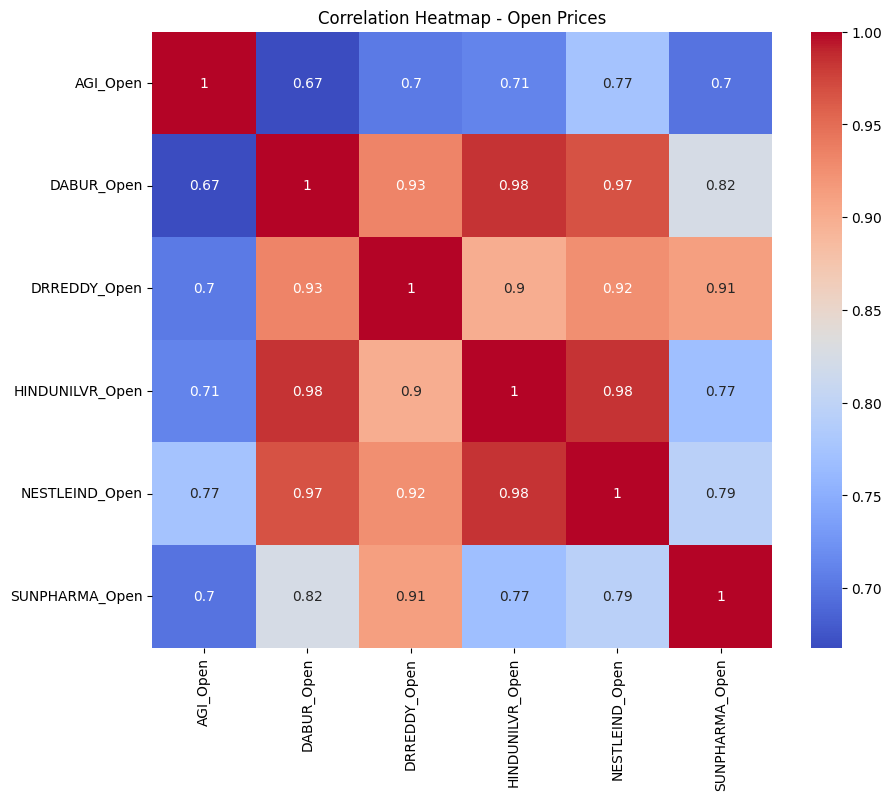

In [7]:
# Filter Open columns
open_cols = [col for col in merged_df.columns if 'Open' in col]
df_open = merged_df[open_cols]

# Calculate correlation
corr_open = df_open.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_open, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Open Prices')
plt.show()


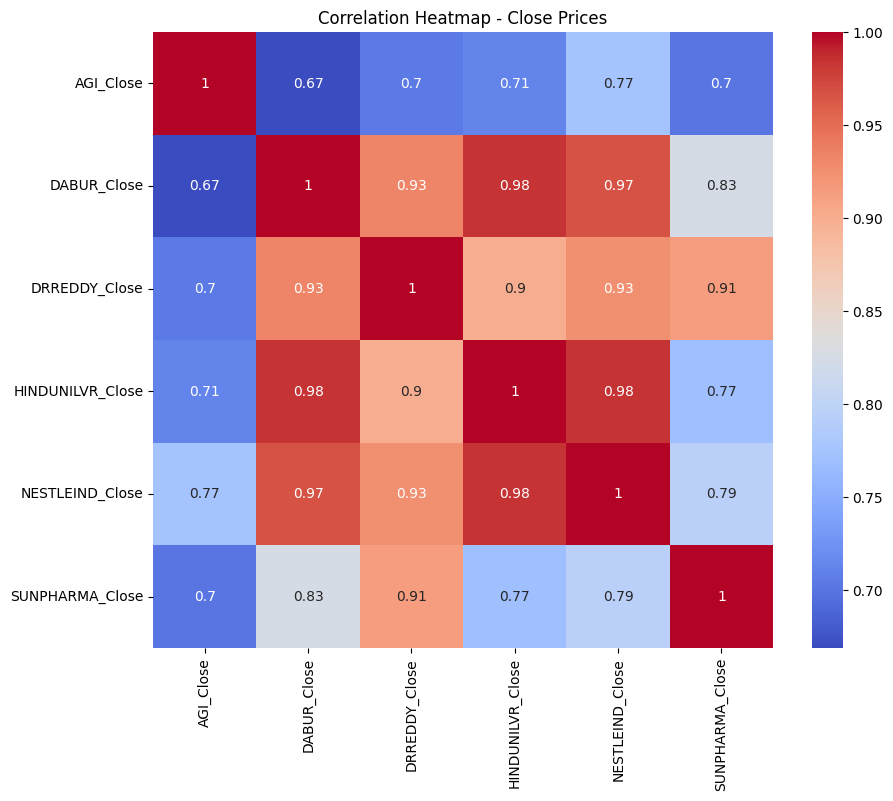

In [8]:
# Filter Close columns
close_cols = [col for col in merged_df.columns if 'Close' in col]
df_close = merged_df[close_cols]

# Calculate correlation
corr_close = df_close.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_close, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Close Prices')
plt.show()


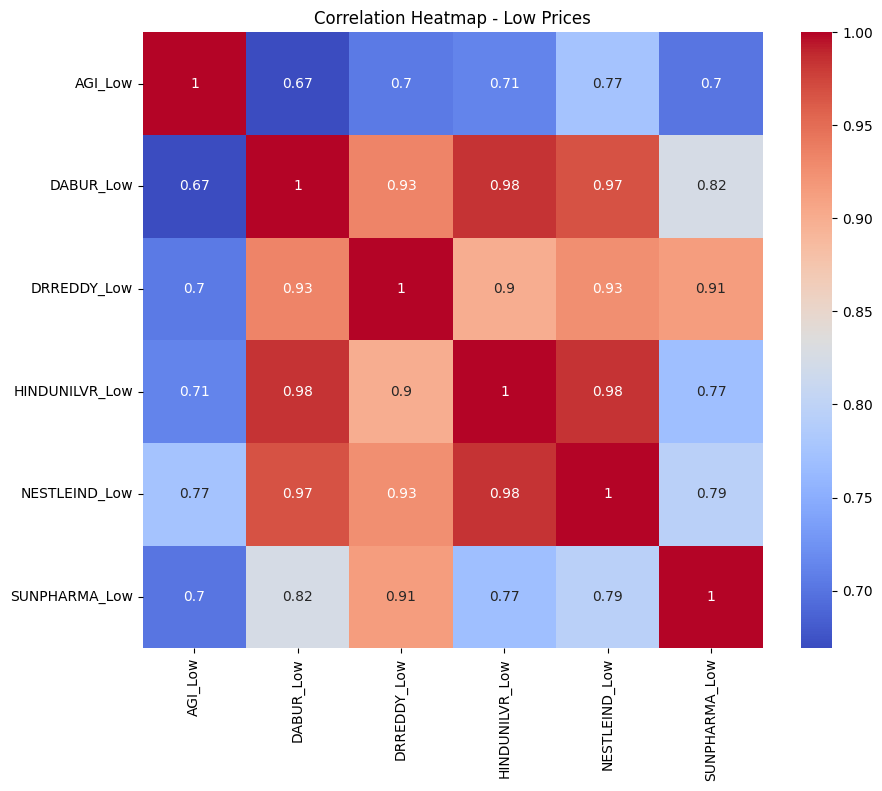

In [9]:
# Filter Low columns
low_cols = [col for col in merged_df.columns if 'Low' in col]
df_low = merged_df[low_cols]

# Calculate correlation
corr_low = df_low.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_low, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Low Prices')
plt.show()


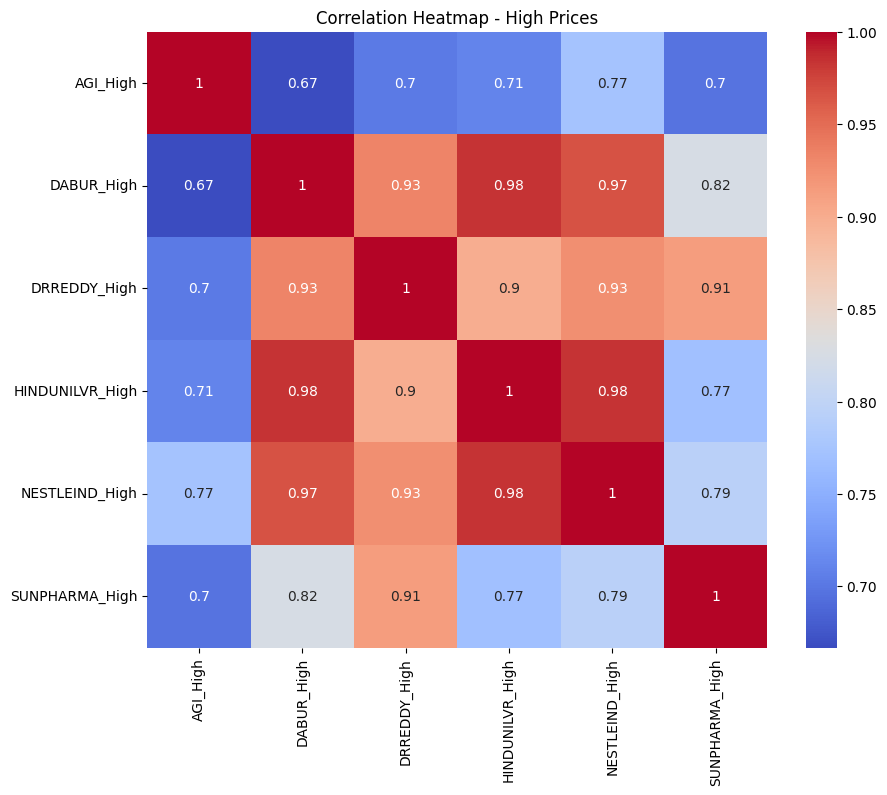

In [10]:
# Filter High columns
high_cols = [col for col in merged_df.columns if 'High' in col]
df_high = merged_df[high_cols]

# Calculate correlation
corr_high = df_high.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_high, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - High Prices')
plt.show()


In [11]:
stocks = ["BALAMINES.NS", "DRREDDY.NS", "AUROPHARMA.NS", "SUNPHARMA.NS",
          "VENKEYS.NS", "WANBURY.NS", "HINDPETRO.NS", "IOC.NS", "ZYDUSLIFE.NS", "HIKAL.NS"]

# Create a DataFrame for each stock
df_balamines = yf.Ticker("BALAMINES.NS").history(period="max")
# df_amnplst = yf.Ticker("AMNPLST.NS").history(period="max")
df_drreddy = yf.Ticker("DRREDDY.NS").history(period="max")
df_auropharma = yf.Ticker("AUROPHARMA.NS").history(period="max")
df_sunpharma = yf.Ticker("SUNPHARMA.NS").history(period="max")
df_venkeys = yf.Ticker("VENKEYS.NS").history(period="max")
df_wanbury = yf.Ticker("WANBURY.NS").history(period="max")
df_hindpetro = yf.Ticker("HINDPETRO.NS").history(period="max")
df_ioc = yf.Ticker("IOC.NS").history(period="max")
df_zyduslife = yf.Ticker("ZYDUSLIFE.NS").history(period="max")
df_hikal = yf.Ticker("HIKAL.NS").history(period="max")


In [12]:
# Extracting the first and last index from each DataFrame
start_dates = [df.index[0] for df in [df_balamines, df_drreddy, df_auropharma, df_sunpharma, 
                                      df_venkeys, df_wanbury, df_hindpetro, df_ioc, df_zyduslife, df_hikal]]
end_dates = [df.index[-1] for df in [df_balamines, df_drreddy, df_auropharma, df_sunpharma, 
                                     df_venkeys, df_wanbury, df_hindpetro, df_ioc, df_zyduslife, df_hikal]]

# Finding the latest start date and the earliest end date
latest_start_date = max(start_dates)
earliest_end_date = min(end_dates)

print(f"Latest common start date: {latest_start_date}")
print(f"Earliest common end date: {earliest_end_date}")


Latest common start date: 2007-04-05 00:00:00+05:30
Earliest common end date: 2023-12-21 00:00:00+05:30


In [13]:
# Filter each DataFrame for the common date range
df_balamines_filtered = df_balamines.loc[latest_start_date:earliest_end_date]
df_drreddy_filtered = df_drreddy.loc[latest_start_date:earliest_end_date]
df_auropharma_filtered = df_auropharma.loc[latest_start_date:earliest_end_date]
df_sunpharma_filtered = df_sunpharma.loc[latest_start_date:earliest_end_date]
df_venkeys_filtered = df_venkeys.loc[latest_start_date:earliest_end_date]
df_wanbury_filtered = df_wanbury.loc[latest_start_date:earliest_end_date]
df_hindpetro_filtered = df_hindpetro.loc[latest_start_date:earliest_end_date]
df_ioc_filtered = df_ioc.loc[latest_start_date:earliest_end_date]
df_zyduslife_filtered = df_zyduslife.loc[latest_start_date:earliest_end_date]
df_hikal_filtered = df_hikal.loc[latest_start_date:earliest_end_date]


In [14]:
# Renaming columns for merging
df_balamines_filtered.columns = [f"BALAMINES_{col}" for col in df_balamines_filtered.columns]
# df_amnplst_filtered.columns = [f"AMNPLST_{col}" for col in df_amnplst_filtered.columns]
df_drreddy_filtered.columns = [f"DRREDDY_{col}" for col in df_drreddy_filtered.columns]
df_auropharma_filtered.columns = [f"AUROPHARMA_{col}" for col in df_auropharma_filtered.columns]
df_sunpharma_filtered.columns = [f"SUNPHARMA_{col}" for col in df_sunpharma_filtered.columns]
df_venkeys_filtered.columns = [f"VENKEYS_{col}" for col in df_venkeys_filtered.columns]
df_wanbury_filtered.columns = [f"WANBURY_{col}" for col in df_wanbury_filtered.columns]
df_hindpetro_filtered.columns = [f"HINDPETRO_{col}" for col in df_hindpetro_filtered.columns]
df_ioc_filtered.columns = [f"IOC_{col}" for col in df_ioc_filtered.columns]
df_zyduslife_filtered.columns = [f"ZYDUSLIFE_{col}" for col in df_zyduslife_filtered.columns]
df_hikal_filtered.columns = [f"HIKAL_{col}" for col in df_hikal_filtered.columns]

# Merging all dataframes on the Date index
merged_df = pd.concat([df_balamines_filtered, df_drreddy_filtered, 
                       df_auropharma_filtered, df_sunpharma_filtered, df_venkeys_filtered, 
                       df_wanbury_filtered, df_hindpetro_filtered, df_ioc_filtered, 
                       df_zyduslife_filtered, df_hikal_filtered], axis=1)

merged_df.head()  # Displaying the first few rows of the merged dataframe


BALAMINES_Open  BALAMINES_High  BALAMINES_Low  \
Date                                                                       
2007-04-05 00:00:00+05:30       24.446354       24.613909      23.549932   
2007-04-09 00:00:00+05:30       24.463109       24.965775      23.642086   
2007-04-10 00:00:00+05:30       24.965775       24.965775      24.965775   
2007-04-11 00:00:00+05:30       24.965777       24.965777      24.362577   
2007-04-12 00:00:00+05:30       25.300890       25.300890      25.300890   

                           BALAMINES_Close  BALAMINES_Volume  \
Date                                                           
2007-04-05 00:00:00+05:30        23.809643            6930.0   
2007-04-09 00:00:00+05:30        24.965775            1215.0   
2007-04-10 00:00:00+05:30        24.965775               0.0   
2007-04-11 00:00:00+05:30        24.362577             750.0   
2007-04-12 00:00:00+05:30        25.300890             100.0   

                           BALAMINES_Dividends  BALAMINES_Stock Splits  \
Date                                                                     
2007-04-05 00:00:00+05:30                  0.0                     0.0   
2007-04-09 00:00:00+05:30                  0.0                     0.0   
2007-04-10 00:00:00+05:30                  0.0                     0.0   
2007-04-11 00:00:00+05:30                  0.0                     0.0   
2007-04-12 00:00:00+05:30                  0.0                     0.0   

                           DRREDDY_Open  DRREDDY_High  DRREDDY_Low  ...  \
Date                                                                ...   
2007-04-05 00:00:00+05:30    659.921291    661.681081   638.979799  ...   
2007-04-09 00:00:00+05:30    643.203110    647.602584   638.363689  ...   
2007-04-10 00:00:00+05:30    641.443463    643.995180   629.652848  ...   
2007-04-11 00:00:00+05:30    630.048785    634.404275   612.406901  ...   
2007-04-12 00:00:00+05:30    615.530605    624.109582   602.728142  ...   

                           ZYDUSLIFE_Volume  ZYDUSLIFE_Dividends  \
Date                                                               
2007-04-05 00:00:00+05:30            120343                  0.0   
2007-04-09 00:00:00+05:30            218472                  0.0   
2007-04-10 00:00:00+05:30             79168                  0.0   
2007-04-11 00:00:00+05:30             79548                  0.0   
2007-04-12 00:00:00+05:30            125692                  0.0   

                           ZYDUSLIFE_Stock Splits  HIKAL_Open  HIKAL_High  \
Date                                                                        
2007-04-05 00:00:00+05:30                     0.0   43.132680   44.035181   
2007-04-09 00:00:00+05:30                     0.0   43.365409   45.408803   
2007-04-10 00:00:00+05:30                     0.0   46.055883   46.055883   
2007-04-11 00:00:00+05:30                     0.0   44.387106   44.387106   
2007-04-12 00:00:00+05:30                     0.0   44.262230   44.443865   

                           HIKAL_Low  HIKAL_Close  HIKAL_Volume  \
Date                                                              
2007-04-05 00:00:00+05:30  41.685274    43.768402         25665   
2007-04-09 00:00:00+05:30  43.365409    44.733349         11572   
2007-04-10 00:00:00+05:30  43.791119    44.273586          7867   
2007-04-11 00:00:00+05:30  43.365410    43.484608         16552   
2007-04-12 00:00:00+05:30  42.684271    43.433517          1935   

                           HIKAL_Dividends  HIKAL_Stock Splits  
Date                                                            
2007-04-05 00:00:00+05:30              0.0                 0.0  
2007-04-09 00:00:00+05:30              0.0                 0.0  
2007-04-10 00:00:00+05:30              0.0                 0.0  
2007-04-11 00:00:00+05:30              0.0                 0.0  
2007-04-12 00:00:00+05:30              0.0                 0.0  

[5 rows x 70 columns]

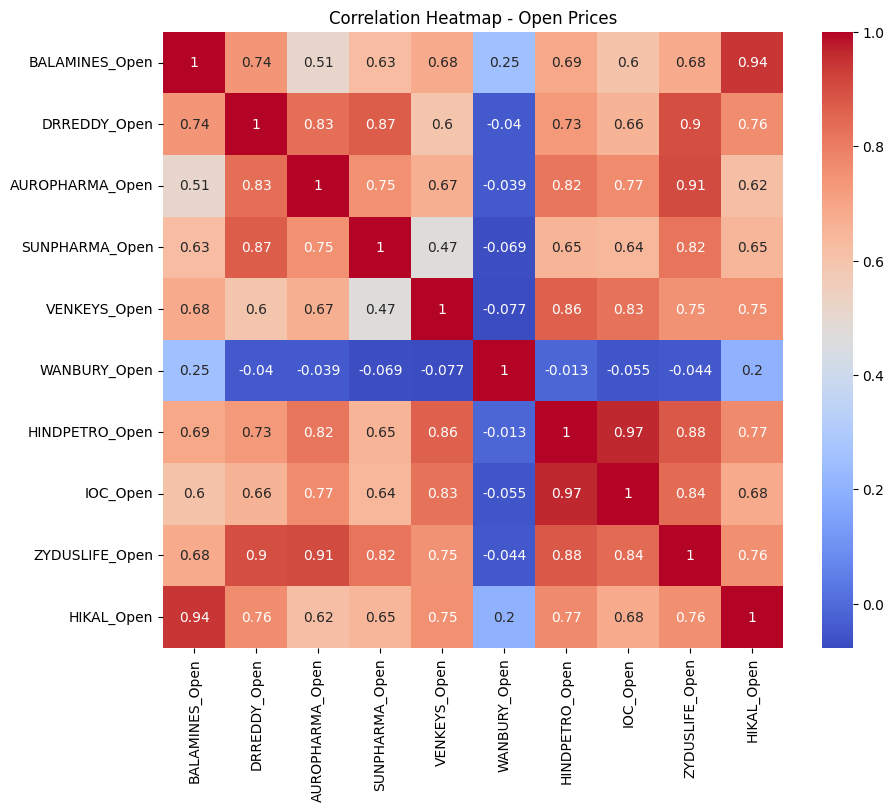

In [15]:
# Filter Open columns
open_cols = [col for col in merged_df.columns if 'Open' in col]
df_open = merged_df[open_cols]

# Calculate correlation
corr_open = df_open.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_open, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Open Prices')
plt.show()


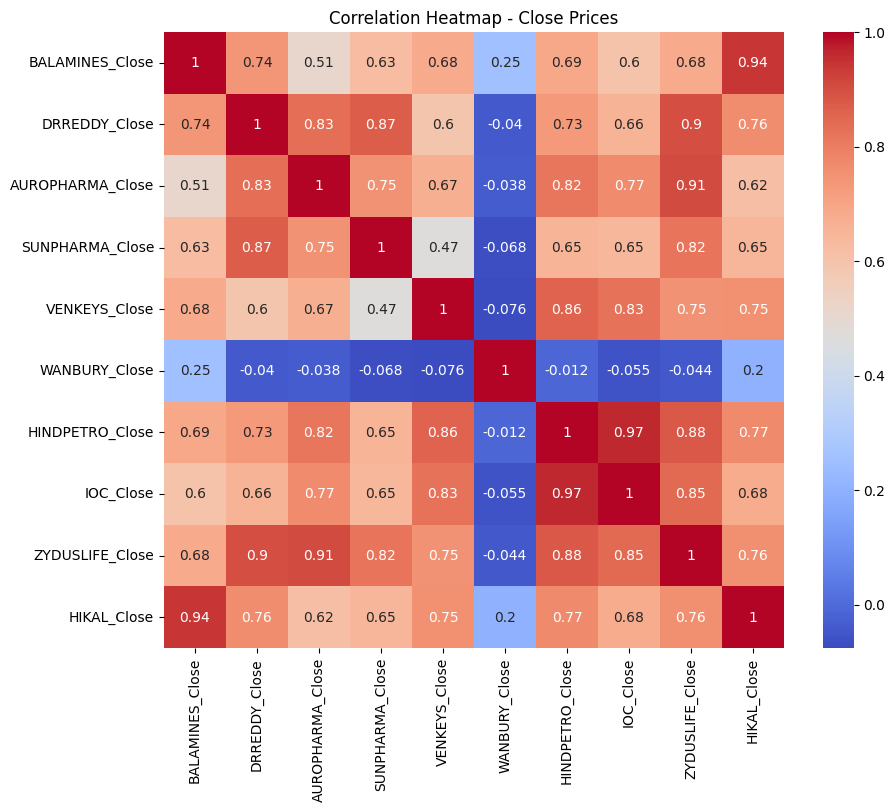

In [16]:
# Filter Close columns
close_cols = [col for col in merged_df.columns if 'Close' in col]
df_close = merged_df[close_cols]

# Calculate correlation
corr_close = df_close.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_close, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Close Prices')
plt.show()


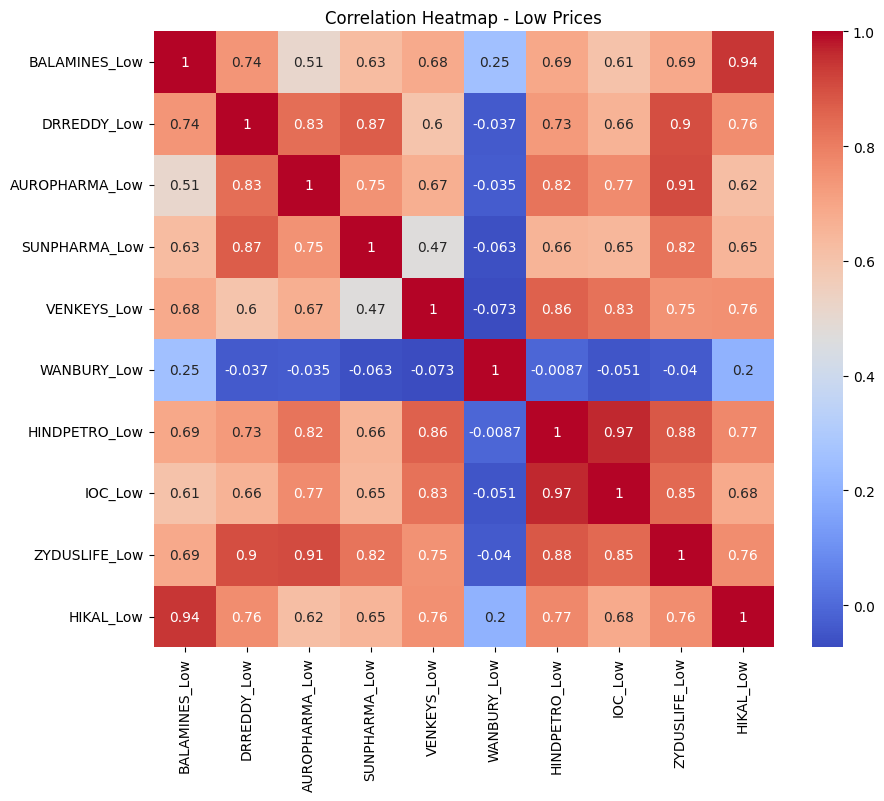

In [17]:
# Filter Low columns
low_cols = [col for col in merged_df.columns if 'Low' in col]
df_low = merged_df[low_cols]

# Calculate correlation
corr_low = df_low.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_low, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Low Prices')
plt.show()

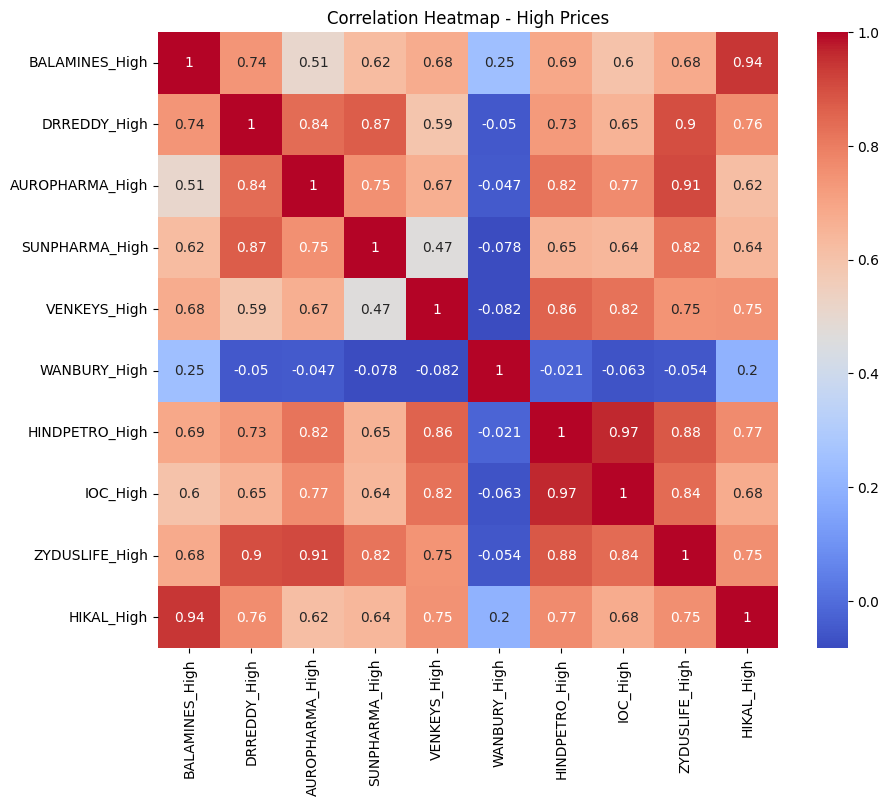

In [18]:
# Filter High columns
high_cols = [col for col in merged_df.columns if 'High' in col]
df_high = merged_df[high_cols]

# Calculate correlation
corr_high = df_high.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_high, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - High Prices')
plt.show()

In [21]:
# New stock symbols
stocks = ["CAMS.NS", "HDFCAMC.NS", "ABCAPITAL.NS"]

# Create a DataFrame for each new stock
df_cams = yf.Ticker("CAMS.NS").history(period="max")
df_hdfcamc = yf.Ticker("HDFCAMC.NS").history(period="max")
df_abcapital = yf.Ticker("ABCAPITAL.NS").history(period="max")


In [35]:
# Extracting the first and last index from each DataFrame
start_dates = [df.index[0] for df in [df_cams,df_hdfcamc,df_abcapital]]
end_dates = [df.index[-1] for df in [df_cams,df_hdfcamc,df_abcapital]]

# Finding the latest start date and the earliest end date
latest_start_date = max(start_dates)
earliest_end_date = min(end_dates)

print(f"Latest common start date: {latest_start_date}")
print(f"Earliest common end date: {earliest_end_date}")

Latest common start date: 2020-10-05 00:00:00+05:30
Earliest common end date: 2023-12-21 00:00:00+05:30


In [36]:
# Filter each DataFrame for the common date range
df_cams_filtered = df_cams.loc[latest_start_date:earliest_end_date]
df_hdfcamc_filtered = df_hdfcamc.loc[latest_start_date:earliest_end_date]
df_abcapital_filtered = df_abcapital.loc[latest_start_date:earliest_end_date]

In [38]:
# Renaming columns for merging
df_cams_filtered.columns = [f"CAMS_{col}" for col in df_cams_filtered.columns]
df_hdfcamc_filtered.columns = [f"HDFCAMC_{col}" for col in df_hdfcamc_filtered.columns]
df_abcapital_filtered.columns = [f"ABCAPITAL_{col}" for col in df_abcapital_filtered.columns]

# Merging the new dataframes on the Date index
merged_df = pd.concat([df_cams_filtered, df_hdfcamc_filtered, df_abcapital_filtered], axis=1)

merged_df.head()  # Displaying the first few rows of the merged dataframe

CAMS_CAMS_Open  CAMS_CAMS_High  CAMS_CAMS_Low  \
Date                                                                       
2020-10-05 00:00:00+05:30     1350.427691     1416.047065    1303.828426   
2020-10-06 00:00:00+05:30     1340.917582     1371.207080    1332.596285   
2020-10-07 00:00:00+05:30     1351.378793     1353.898981    1289.325685   
2020-10-08 00:00:00+05:30     1317.142542     1321.849973    1260.272370   
2020-10-09 00:00:00+05:30     1261.128250     1304.018570    1231.552005   

                           CAMS_CAMS_Close  CAMS_CAMS_Volume  \
Date                                                           
2020-10-05 00:00:00+05:30      1332.739014            638095   
2020-10-06 00:00:00+05:30      1349.857056            542573   
2020-10-07 00:00:00+05:30      1313.766479            283115   
2020-10-08 00:00:00+05:30      1269.497192            287027   
2020-10-09 00:00:00+05:30      1271.304077            617512   

                           CAMS_CAMS_Dividends  CAMS_CAMS_Stock Splits  \
Date                                                                     
2020-10-05 00:00:00+05:30                  0.0                     0.0   
2020-10-06 00:00:00+05:30                  0.0                     0.0   
2020-10-07 00:00:00+05:30                  0.0                     0.0   
2020-10-08 00:00:00+05:30                  0.0                     0.0   
2020-10-09 00:00:00+05:30                  0.0                     0.0   

                           HDFCAMC_HDFCAMC_Open  HDFCAMC_HDFCAMC_High  \
Date                                                                    
2020-10-05 00:00:00+05:30           2169.926615           2191.625881   
2020-10-06 00:00:00+05:30           2178.370557           2194.361927   
2020-10-07 00:00:00+05:30           2187.852167           2211.910050   
2020-10-08 00:00:00+05:30           2207.240126           2222.759773   
2020-10-09 00:00:00+05:30           2213.985524           2239.930299   

                           HDFCAMC_HDFCAMC_Low  ...  HDFCAMC_HDFCAMC_Volume  \
Date                                            ...                           
2020-10-05 00:00:00+05:30          2141.623224  ...                  232172   
2020-10-06 00:00:00+05:30          2159.548847  ...                  163855   
2020-10-07 00:00:00+05:30          2161.812954  ...                  230574   
2020-10-08 00:00:00+05:30          2189.739148  ...                  181093   
2020-10-09 00:00:00+05:30          2198.418659  ...                  204643   

                           HDFCAMC_HDFCAMC_Dividends  \
Date                                                   
2020-10-05 00:00:00+05:30                        0.0   
2020-10-06 00:00:00+05:30                        0.0   
2020-10-07 00:00:00+05:30                        0.0   
2020-10-08 00:00:00+05:30                        0.0   
2020-10-09 00:00:00+05:30                        0.0   

                           HDFCAMC_HDFCAMC_Stock Splits  \
Date                                                      
2020-10-05 00:00:00+05:30                           0.0   
2020-10-06 00:00:00+05:30                           0.0   
2020-10-07 00:00:00+05:30                           0.0   
2020-10-08 00:00:00+05:30                           0.0   
2020-10-09 00:00:00+05:30                           0.0   

                           ABCAPITAL_ABCAPITAL_Open  ABCAPITAL_ABCAPITAL_High  \
Date                                                                            
2020-10-05 00:00:00+05:30                 63.400002                 65.650002   
2020-10-06 00:00:00+05:30                 64.599998                 64.949997   
2020-10-07 00:00:00+05:30                 64.300003                 64.400002   
2020-10-08 00:00:00+05:30                 62.049999                 64.250000   
2020-10-09 00:00:00+05:30                 63.700001                 64.750000   

                           ABCAPITAL_ABCAPITAL_Low  ABCAPITAL_ABCAPITAL_Close  \
Date

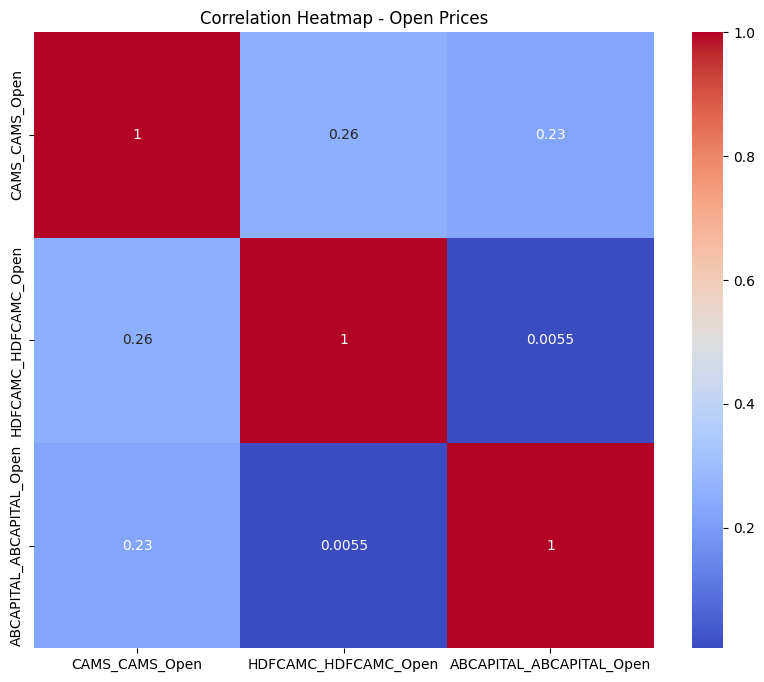

In [39]:
# Filter Open columns
open_cols = [col for col in merged_df.columns if 'Open' in col]
df_open = merged_df[open_cols]

# Calculate correlation
corr_open = df_open.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_open, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Open Prices')
plt.show()


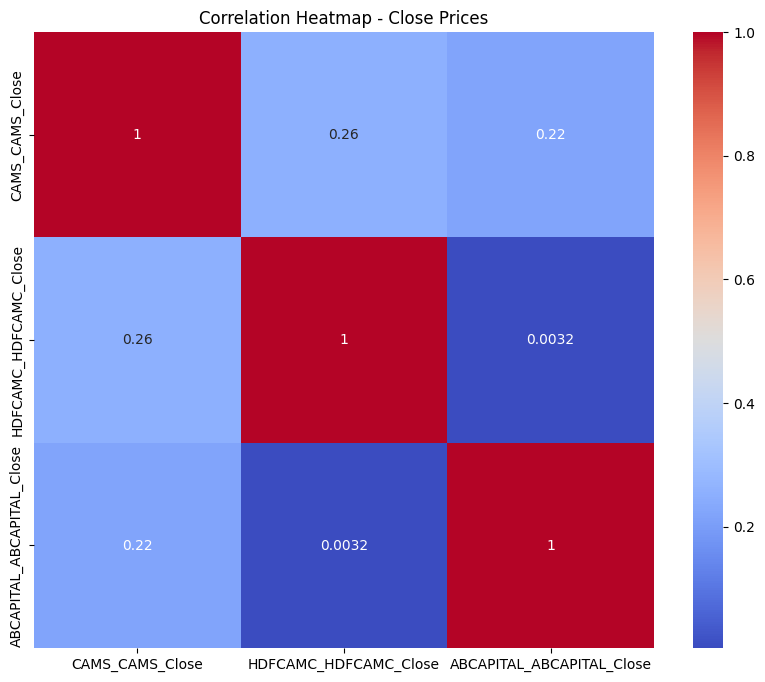

In [40]:
# Filter Close columns
close_cols = [col for col in merged_df.columns if 'Close' in col]
df_close = merged_df[close_cols]

# Calculate correlation
corr_close = df_close.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_close, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Close Prices')
plt.show()


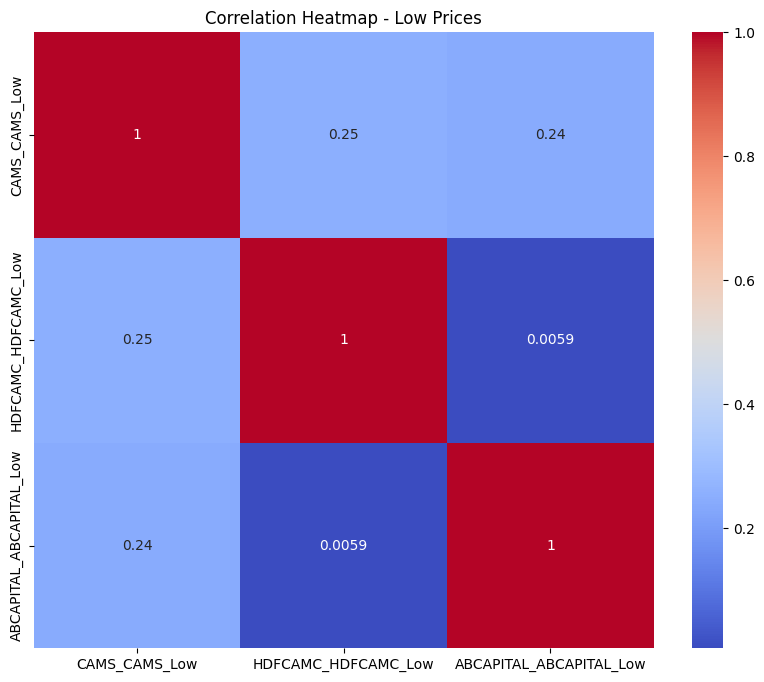

In [41]:
# Filter Low columns
low_cols = [col for col in merged_df.columns if 'Low' in col]
df_low = merged_df[low_cols]

# Calculate correlation
corr_low = df_low.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_low, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Low Prices')
plt.show()

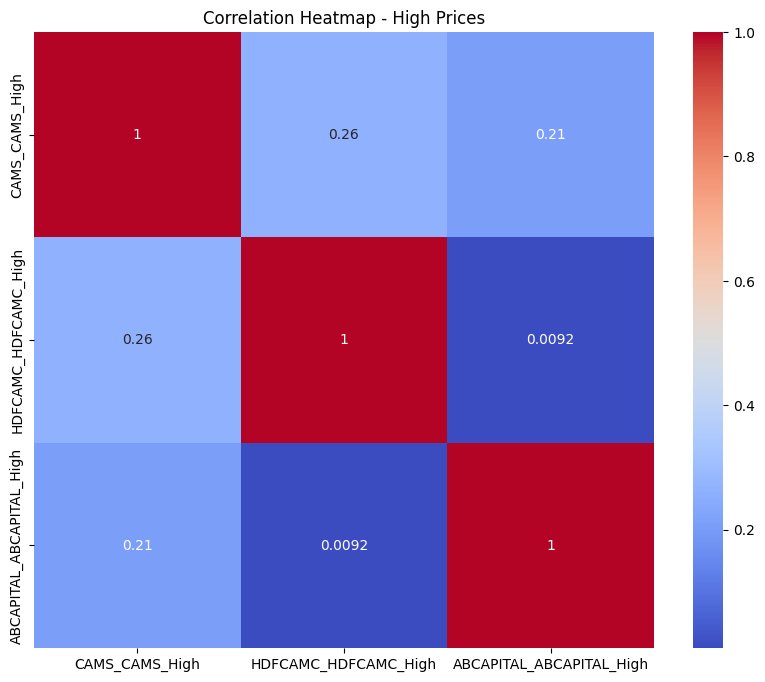

In [42]:
# Filter High columns
high_cols = [col for col in merged_df.columns if 'High' in col]
df_high = merged_df[high_cols]

# Calculate correlation
corr_high = df_high.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_high, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - High Prices')
plt.show()

In [13]:
# Updated stock symbols
stocks = ["DEEPAKNTR.NS", "RELIANCE.NS", "HINDUNILVR.NS", "BAYERCROP.NS",
          "BASF.NS", "UPL.NS", "ESSAROIL.NS", "GOODYEAR.NS", "LUPIN.NS",
          "AUROPHARMA.NS", "DRREDDY.NS", "ITC.NS", "BPCL.NS", "SUNPHARMA.NS",
          "IPCALAB.NS", "RALLIS.NS", "NAVINFLUOR.NS", "DIVISLAB.NS",
          "FLUOROCHEM.NS", "LXCHEM.NS", "ALKYLAMINE.NS", "PIIND.NS",
          "VINATIORGA.NS", "IOC.NS", "ALEMBICLTD.NS", "ATUL.NS", "SYNGENE.NS",
          "AARTIIND.NS"]

# Create a DataFrame for each stock
df_deepakntr = yf.Ticker("DEEPAKNTR.NS").history(period="max")
df_reliance = yf.Ticker("RELIANCE.NS").history(period="max")
df_hindunilvr = yf.Ticker("HINDUNILVR.NS").history(period="max")
df_bayercrop = yf.Ticker("BAYERCROP.NS").history(period="max")
df_basf = yf.Ticker("BASF.NS").history(period="max")
df_upl = yf.Ticker("UPL.NS").history(period="max")
# Essar Oil is no longer listed, so this line should be updated or removed depending on the context.
# df_essaroil = yf.Ticker("ESSAROIL.NS").history(period="max")
df_goodyear = yf.Ticker("GOODYEAR.NS").history(period="max")
df_lupin = yf.Ticker("LUPIN.NS").history(period="max")
df_auropharma = yf.Ticker("AUROPHARMA.NS").history(period="max")
df_drreddy = yf.Ticker("DRREDDY.NS").history(period="max")
df_itc = yf.Ticker("ITC.NS").history(period="max")
df_bpcl = yf.Ticker("BPCL.NS").history(period="max")
df_sunpharma = yf.Ticker("SUNPHARMA.NS").history(period="max")
df_ipcalab = yf.Ticker("IPCALAB.NS").history(period="max")
df_rallis = yf.Ticker("RALLIS.NS").history(period="max")
df_navinfluor = yf.Ticker("NAVINFLUOR.NS").history(period="max")
df_divislab = yf.Ticker("DIVISLAB.NS").history(period="max")
df_fluorochem = yf.Ticker("FLUOROCHEM.NS").history(period="max")
df_lxchem = yf.Ticker("LXCHEM.NS").history(period="max")
df_alkylamine = yf.Ticker("ALKYLAMINE.NS").history(period="max")
df_piind = yf.Ticker("PIIND.NS").history(period="max")
df_vinatiorga = yf.Ticker("VINATIORGA.NS").history(period="max")
df_ioc = yf.Ticker("IOC.NS").history(period="max")
df_alembicltd = yf.Ticker("ALEMBICLTD.NS").history(period="max")
df_atul = yf.Ticker("ATUL.NS").history(period="max")
df_syngene = yf.Ticker("SYNGENE.NS").history(period="max")
df_aartiind = yf.Ticker("AARTIIND.NS").history(period="max")

In [17]:
# Extracting the first and last index from each DataFrame
start_dates = [
    df.index[0] for df in [
        df_deepakntr, df_reliance, df_hindunilvr, df_bayercrop, df_basf, df_upl,
        df_goodyear, df_lupin, df_auropharma, df_drreddy, df_itc, df_bpcl,
        df_sunpharma, df_ipcalab, df_rallis, df_navinfluor, df_divislab,
        df_fluorochem, df_lxchem, df_alkylamine, df_piind, df_vinatiorga,
        df_ioc, df_alembicltd, df_atul, df_syngene, df_aartiind
    ]
]
end_dates = [
    df.index[-1] for df in [
        df_deepakntr, df_reliance, df_hindunilvr, df_bayercrop, df_basf, df_upl,
        df_goodyear, df_lupin, df_auropharma, df_drreddy, df_itc, df_bpcl,
        df_sunpharma, df_ipcalab, df_rallis, df_navinfluor, df_divislab,
        df_fluorochem, df_lxchem, df_alkylamine, df_piind, df_vinatiorga,
        df_ioc, df_alembicltd, df_atul, df_syngene, df_aartiind
    ]
]

# Finding the latest start date and the earliest end date
latest_start_date = min(start_dates)
earliest_end_date = min(end_dates)

print(f"Latest common start date: {latest_start_date}")
print(f"Earliest common end date: {earliest_end_date}")


Latest common start date: 1996-01-01 00:00:00+05:30
Earliest common end date: 2023-12-06 00:00:00+05:30


In [18]:
# Filter each DataFrame for the common date range
df_deepakntr_filtered = df_deepakntr.loc[latest_start_date:earliest_end_date]
df_reliance_filtered = df_reliance.loc[latest_start_date:earliest_end_date]
df_hindunilvr_filtered = df_hindunilvr.loc[latest_start_date:earliest_end_date]
df_bayercrop_filtered = df_bayercrop.loc[latest_start_date:earliest_end_date]
df_basf_filtered = df_basf.loc[latest_start_date:earliest_end_date]
df_upl_filtered = df_upl.loc[latest_start_date:earliest_end_date]
# Assuming df_essaroil exists and is the DataFrame for ESSAROIL, if not, this line should be omitted or corrected.
# df_essaroil_filtered = df_essaroil.loc[latest_start_date:earliest_end_date]
df_goodyear_filtered = df_goodyear.loc[latest_start_date:earliest_end_date]
df_lupin_filtered = df_lupin.loc[latest_start_date:earliest_end_date]
df_auropharma_filtered = df_auropharma.loc[latest_start_date:earliest_end_date]
df_drreddy_filtered = df_drreddy.loc[latest_start_date:earliest_end_date]
df_itc_filtered = df_itc.loc[latest_start_date:earliest_end_date]
df_bpcl_filtered = df_bpcl.loc[latest_start_date:earliest_end_date]
df_sunpharma_filtered = df_sunpharma.loc[latest_start_date:earliest_end_date]
df_ipcalab_filtered = df_ipcalab.loc[latest_start_date:earliest_end_date]
df_rallis_filtered = df_rallis.loc[latest_start_date:earliest_end_date]
df_navinfluor_filtered = df_navinfluor.loc[latest_start_date:earliest_end_date]
df_divislab_filtered = df_divislab.loc[latest_start_date:earliest_end_date]
df_fluorochem_filtered = df_fluorochem.loc[latest_start_date:earliest_end_date]
df_lxchem_filtered = df_lxchem.loc[latest_start_date:earliest_end_date]
df_alkylamine_filtered = df_alkylamine.loc[latest_start_date:earliest_end_date]
df_piind_filtered = df_piind.loc[latest_start_date:earliest_end_date]
df_vinatiorga_filtered = df_vinatiorga.loc[latest_start_date:earliest_end_date]
df_ioc_filtered = df_ioc.loc[latest_start_date:earliest_end_date]
df_alembicltd_filtered = df_alembicltd.loc[latest_start_date:earliest_end_date]
df_atul_filtered = df_atul.loc[latest_start_date:earliest_end_date]
df_syngene_filtered = df_syngene.loc[latest_start_date:earliest_end_date]
df_aartiind_filtered = df_aartiind.loc[latest_start_date:earliest_end_date]

In [19]:
# Renaming columns for merging
df_deepakntr_filtered.columns = [f"DEEPAKNTR_{col}" for col in df_deepakntr_filtered.columns]
df_reliance_filtered.columns = [f"RELIANCE_{col}" for col in df_reliance_filtered.columns]
df_hindunilvr_filtered.columns = [f"HINDUNILVR_{col}" for col in df_hindunilvr_filtered.columns]
df_bayercrop_filtered.columns = [f"BAYERCROP_{col}" for col in df_bayercrop_filtered.columns]
df_basf_filtered.columns = [f"BASF_{col}" for col in df_basf_filtered.columns]
df_upl_filtered.columns = [f"UPL_{col}" for col in df_upl_filtered.columns]
df_goodyear_filtered.columns = [f"GOODYEAR_{col}" for col in df_goodyear_filtered.columns]
df_lupin_filtered.columns = [f"LUPIN_{col}" for col in df_lupin_filtered.columns]
df_auropharma_filtered.columns = [f"AUROPHARMA_{col}" for col in df_auropharma_filtered.columns]
df_drreddy_filtered.columns = [f"DRREDDY_{col}" for col in df_drreddy_filtered.columns]
df_itc_filtered.columns = [f"ITC_{col}" for col in df_itc_filtered.columns]
df_bpcl_filtered.columns = [f"BPCL_{col}" for col in df_bpcl_filtered.columns]
df_sunpharma_filtered.columns = [f"SUNPHARMA_{col}" for col in df_sunpharma_filtered.columns]
df_ipcalab_filtered.columns = [f"IPCALAB_{col}" for col in df_ipcalab_filtered.columns]
df_rallis_filtered.columns = [f"RALLIS_{col}" for col in df_rallis_filtered.columns]
df_navinfluor_filtered.columns = [f"NAVINFLUOR_{col}" for col in df_navinfluor_filtered.columns]
df_divislab_filtered.columns = [f"DIVISLAB_{col}" for col in df_divislab_filtered.columns]
df_fluorochem_filtered.columns = [f"FLUOROCHEM_{col}" for col in df_fluorochem_filtered.columns]
df_lxchem_filtered.columns = [f"LXCHEM_{col}" for col in df_lxchem_filtered.columns]
df_alkylamine_filtered.columns = [f"ALKYLAMINE_{col}" for col in df_alkylamine_filtered.columns]
df_piind_filtered.columns = [f"PIIND_{col}" for col in df_piind_filtered.columns]
df_vinatiorga_filtered.columns = [f"VINATIORGA_{col}" for col in df_vinatiorga_filtered.columns]
df_ioc_filtered.columns = [f"IOC_{col}" for col in df_ioc_filtered.columns]
df_alembicltd_filtered.columns = [f"ALEMBICLTD_{col}" for col in df_alembicltd_filtered.columns]
df_atul_filtered.columns = [f"ATUL_{col}" for col in df_atul_filtered.columns]
df_syngene_filtered.columns = [f"SYNGENE_{col}" for col in df_syngene_filtered.columns]
df_aartiind_filtered.columns = [f"AARTIIND_{col}" for col in df_aartiind_filtered.columns]

# Merging all filtered dataframes on the Date index
merged_df = pd.concat([
    df_deepakntr_filtered, df_reliance_filtered, df_hindunilvr_filtered, df_bayercrop_filtered,
    df_basf_filtered, df_upl_filtered, # df_essaroil_filtered, # Uncomment if df_essaroil exists
    df_goodyear_filtered, df_lupin_filtered, df_auropharma_filtered, df_drreddy_filtered,
    df_itc_filtered, df_bpcl_filtered, df_sunpharma_filtered, df_ipcalab_filtered,
    df_rallis_filtered, df_navinfluor_filtered, df_divislab_filtered, df_fluorochem_filtered,
    df_lxchem_filtered, df_alkylamine_filtered, df_piind_filtered, df_vinatiorga_filtered,
    df_ioc_filtered, df_alembicltd_filtered, df_atul_filtered, df_syngene_filtered, df_aartiind_filtered
], axis=1)

merged_df.head()  # Displaying the first few rows of


DEEPAKNTR_Open  DEEPAKNTR_High  DEEPAKNTR_Low  \
Date                                                                       
1996-01-01 00:00:00+05:30             NaN             NaN            NaN   
1996-01-02 00:00:00+05:30             NaN             NaN            NaN   
1996-01-03 00:00:00+05:30             NaN             NaN            NaN   
1996-01-04 00:00:00+05:30             NaN             NaN            NaN   
1996-01-05 00:00:00+05:30             NaN             NaN            NaN   

                           DEEPAKNTR_Close  DEEPAKNTR_Volume  \
Date                                                           
1996-01-01 00:00:00+05:30              NaN               NaN   
1996-01-02 00:00:00+05:30              NaN               NaN   
1996-01-03 00:00:00+05:30              NaN               NaN   
1996-01-04 00:00:00+05:30              NaN               NaN   
1996-01-05 00:00:00+05:30              NaN               NaN   

                           DEEPAKNTR_Dividends  DEEPAKNTR_Stock Splits  \
Date                                                                     
1996-01-01 00:00:00+05:30                  NaN                     NaN   
1996-01-02 00:00:00+05:30                  NaN                     NaN   
1996-01-03 00:00:00+05:30                  NaN                     NaN   
1996-01-04 00:00:00+05:30                  NaN                     NaN   
1996-01-05 00:00:00+05:30                  NaN                     NaN   

                           RELIANCE_Open  RELIANCE_High  RELIANCE_Low  ...  \
Date                                                                   ...   
1996-01-01 00:00:00+05:30      10.403049      10.458870     10.334540  ...   
1996-01-02 00:00:00+05:30      10.415735      10.466482     10.283794  ...   
1996-01-03 00:00:00+05:30      10.529914      11.009469     10.415734  ...   
1996-01-04 00:00:00+05:30      10.339617      10.372603     10.202601  ...   
1996-01-05 00:00:00+05:30      10.301555      10.301555     10.182300  ...   

                           SYNGENE_Volume  SYNGENE_Dividends  \
Date                                                           
1996-01-01 00:00:00+05:30             NaN                NaN   
1996-01-02 00:00:00+05:30             NaN                NaN   
1996-01-03 00:00:00+05:30             NaN                NaN   
1996-01-04 00:00:00+05:30             NaN                NaN   
1996-01-05 00:00:00+05:30             NaN                NaN   

                           SYNGENE_Stock Splits  AARTIIND_Open  AARTIIND_High  \
Date                                                                            
1996-01-01 00:00:00+05:30                   NaN            NaN            NaN   
1996-01-02 00:00:00+05:30                   NaN            NaN            NaN   
1996-01-03 00:00:00+05:30                   NaN            NaN            NaN   
1996-01-04 00:00:00+05:30                   NaN            NaN            NaN   
1996-01-05 00:00:00+05:30                   NaN            NaN            NaN   

                           AARTIIND_Low  AARTIIND_Close  AARTIIND_Volume  \
Date                                                                       
1996-01-01 00:00:00+05:30           NaN             NaN              NaN   
1996-01-02 00:00:00+05:30           NaN             NaN              NaN   
1996-01-03 00:00:00+05:30           NaN             NaN              NaN   
1996-01-04 00:00:00+05:30           NaN             NaN              NaN   
1996-01-05 00:00:00+05:30           NaN             NaN              NaN   

                           AARTIIND_Dividends  AARTIIND_Stock Splits  
Date                                                                  
1996-01-01 00:00:00+05:30                 NaN                    NaN  
1996-01-02 00:00:00+05:30                 NaN                    NaN  
1996-01-03 00:00:00+05:30                 NaN                    NaN  
1996-01-04 00:00:00+05:30                 NaN                    NaN  
199

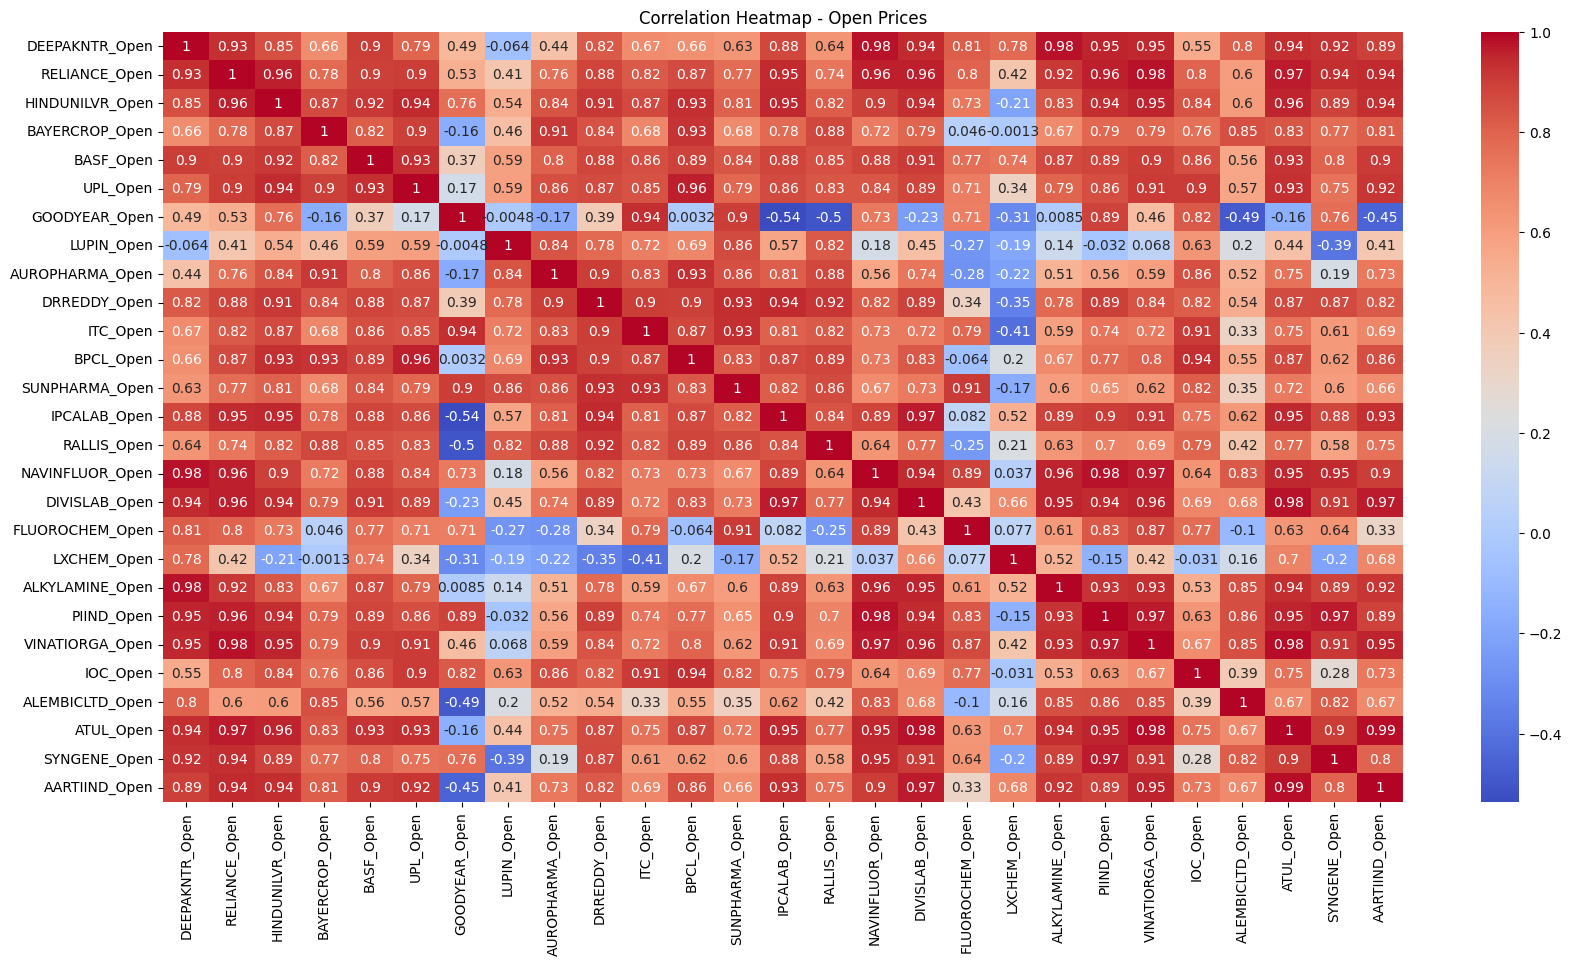

In [20]:
# Filter Open columns
open_cols = [col for col in merged_df.columns if 'Open' in col]
df_open = merged_df[open_cols]

# Calculate correlation
corr_open = df_open.corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_open, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Open Prices')
plt.show()


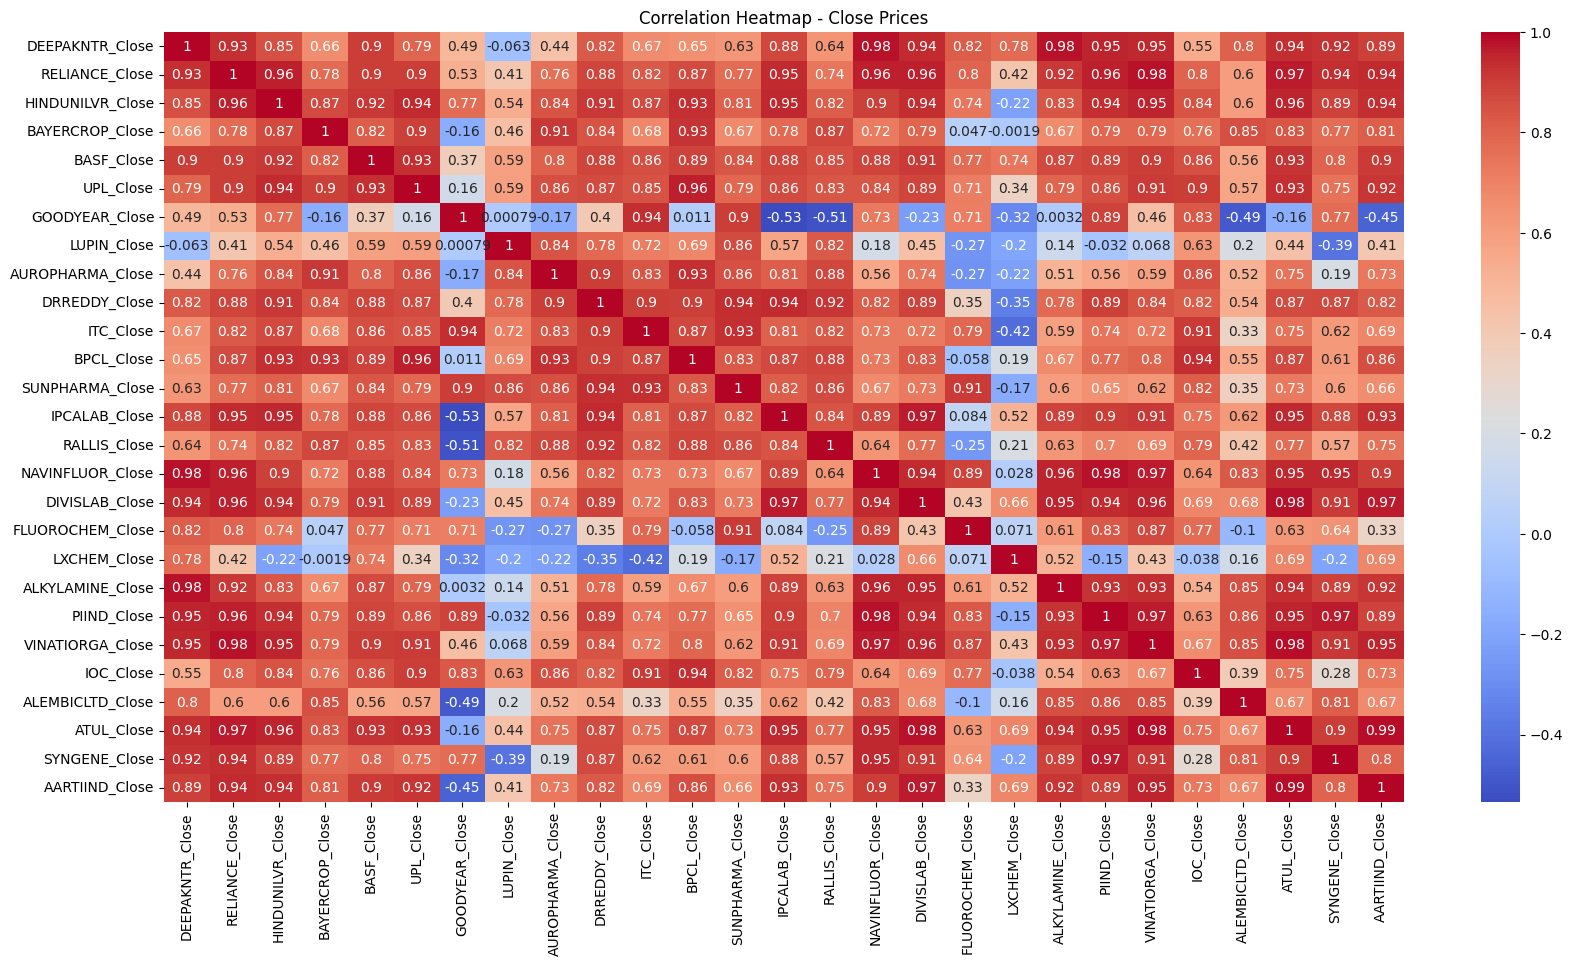

In [21]:
# Filter Close columns
close_cols = [col for col in merged_df.columns if 'Close' in col]
df_close = merged_df[close_cols]

# Calculate correlation
corr_close = df_close.corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_close, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Close Prices')
plt.show()


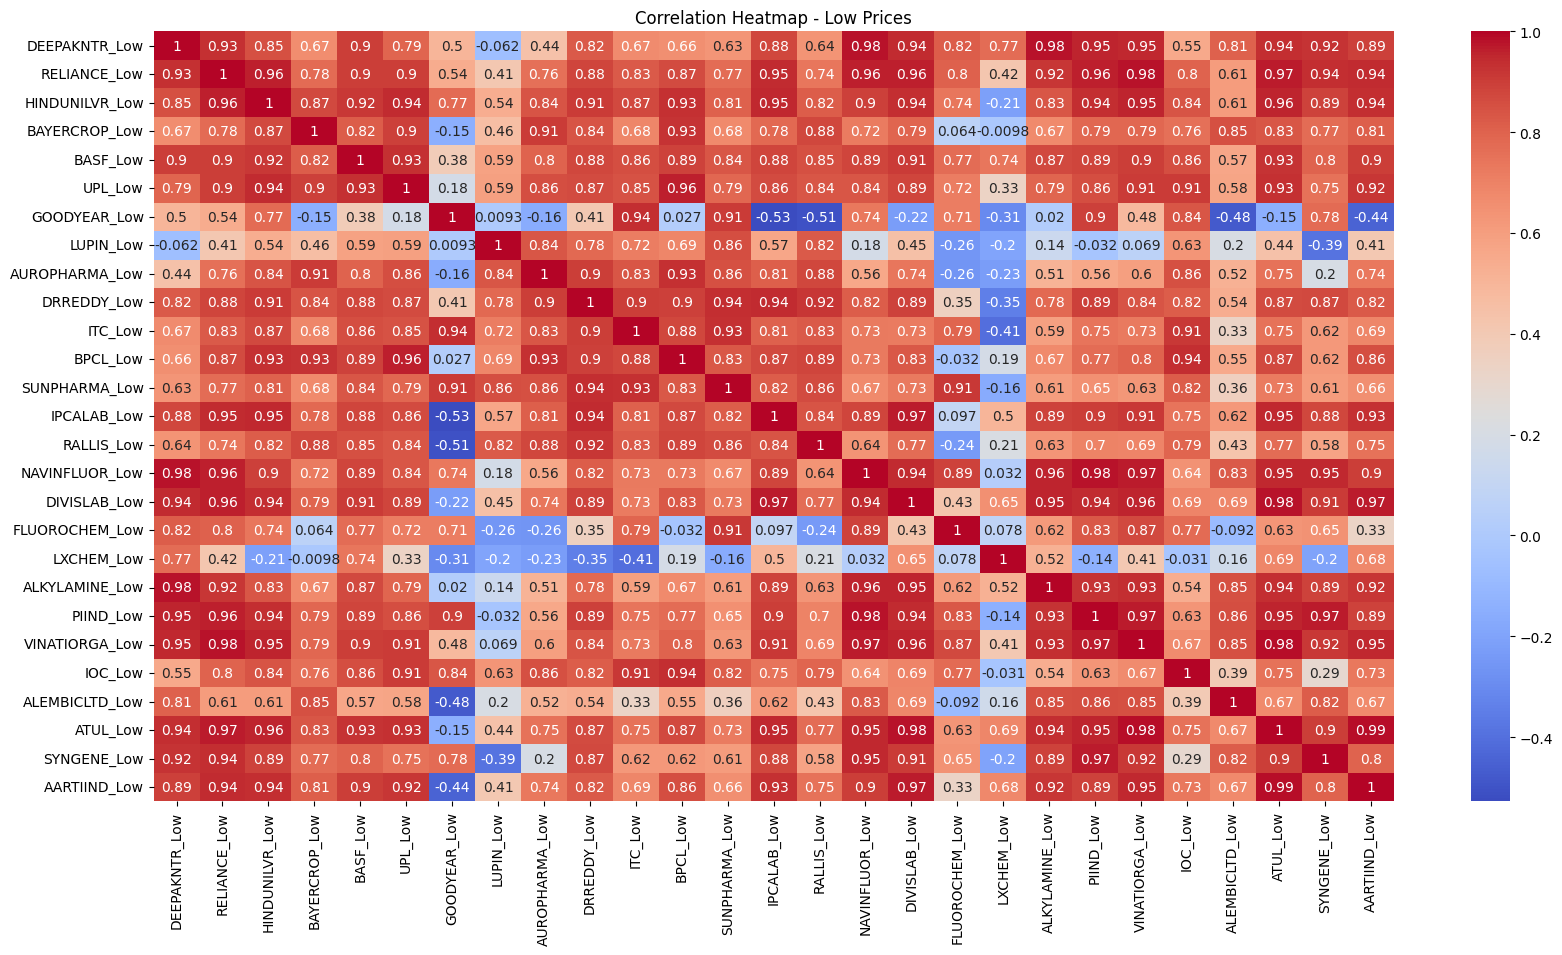

In [22]:
# Filter Low columns
low_cols = [col for col in merged_df.columns if 'Low' in col]
df_low = merged_df[low_cols]

# Calculate correlation
corr_low = df_low.corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_low, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Low Prices')
plt.show()

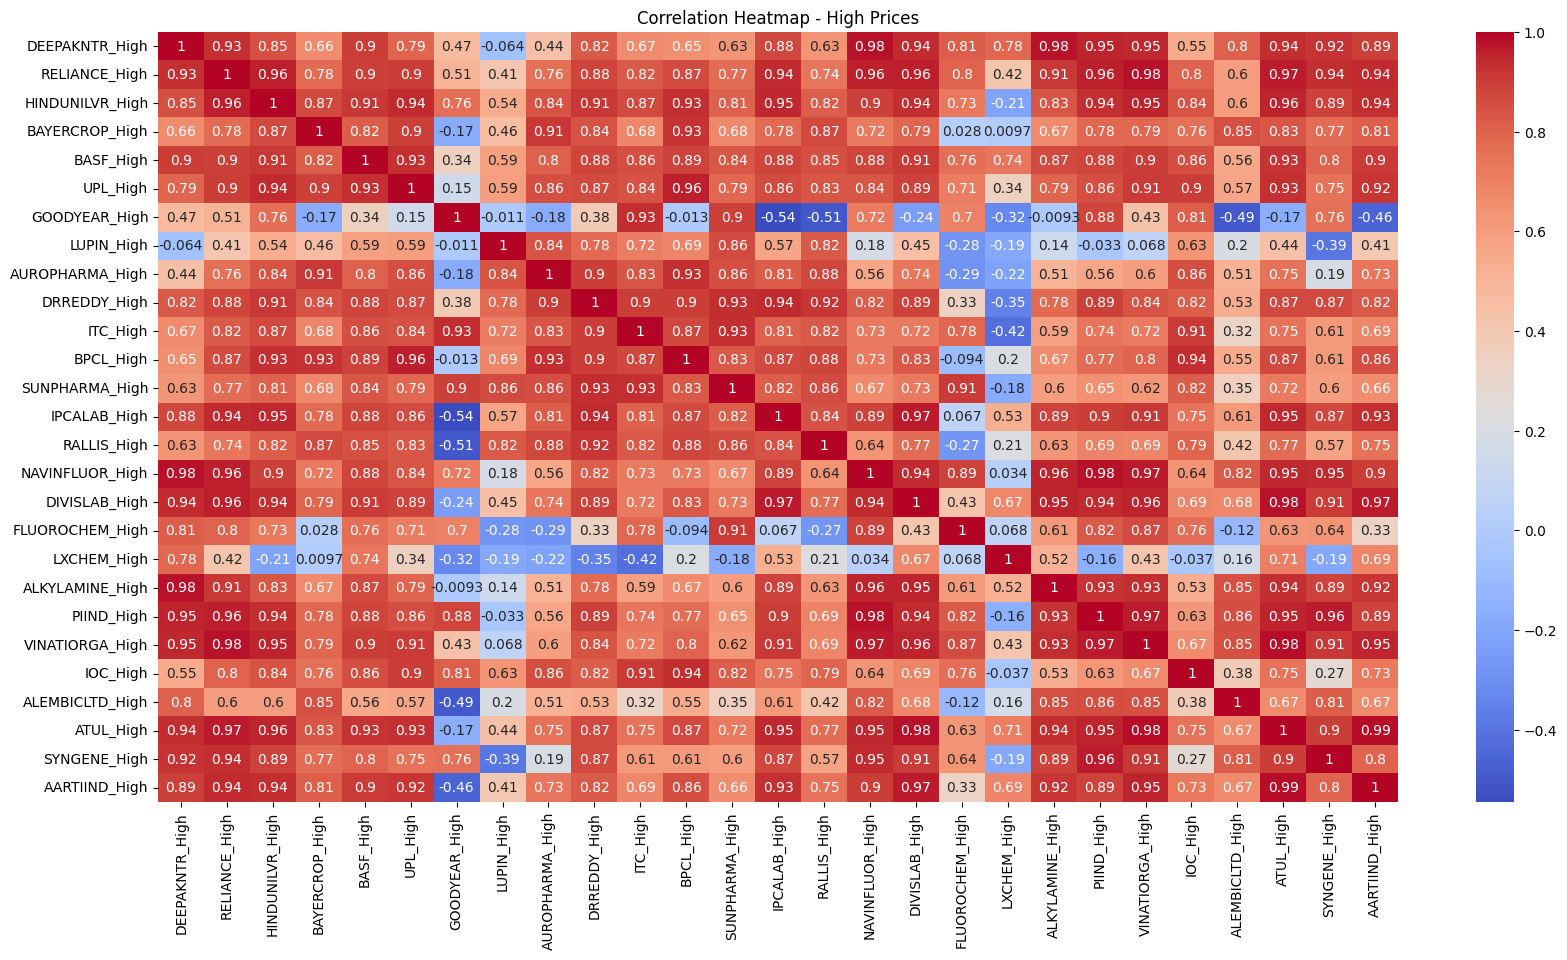

In [23]:
# Filter High columns
high_cols = [col for col in merged_df.columns if 'High' in col]
df_high = merged_df[high_cols]

# Calculate correlation
corr_high = df_high.corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_high, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - High Prices')
plt.show()

In [94]:
# Fetching historical data for each stock
df_elgiequip = yf.Ticker("ELGIEQUIP.NS").history(period="max")
df_heromotoco = yf.Ticker("HEROMOTOCO.NS").history(period="max")
df_maruti = yf.Ticker("MARUTI.NS").history(period="max")
df_tatamotors = yf.Ticker("TATAMOTORS.NS").history(period="max")
df_tvsmotor = yf.Ticker("TVSMOTOR.NS").history(period="max")
df_alokinds = yf.Ticker("ALOKINDS.NS").history(period="max")
df_arvind = yf.Ticker("ARVIND.NS").history(period="max")
df_dollar = yf.Ticker("DOLLAR.NS").history(period="max")
df_icil = yf.Ticker("ICIL.NS").history(period="max")
df_kgdenim = yf.Ticker("KGDENIM.BO").history(period="max")  # Correct code for KGDENIM
df_laxmimach = yf.Ticker("LAXMIMACH.NS").history(period="max")
df_mafatlalind = yf.Ticker("MAFATIND.BO").history(period="max")  # Correct code for MAFATIND
df_naharsping = yf.Ticker("NAHARSPING.NS").history(period="max")
df_raymond = yf.Ticker("RAYMOND.NS").history(period="max")
df_drreddy = yf.Ticker("DRREDDY.NS").history(period="max")
df_ipcalab = yf.Ticker("IPCALAB.NS").history(period="max")
# df_mankind = yf.Ticker("MANKIND.NS").history(period="max")  # Replace MANKIND.NS with the correct symbol if needed
df_jublpharma = yf.Ticker("JUBLPHARMA.NS").history(period="max")
df_wockpharma = yf.Ticker("WOCKPHARMA.NS").history(period="max")
df_acc = yf.Ticker("ACC.NS").history(period="max")
df_orientcem = yf.Ticker("ORIENTCEM.NS").history(period="max")
df_ultracemco = yf.Ticker("ULTRACEMCO.NS").history(period="max")
df_indiacem = yf.Ticker("INDIACEM.NS").history(period="max")
df_jindalstel = yf.Ticker("JINDALSTEL.NS").history(period="max")
df_jswsteel = yf.Ticker("JSWSTEEL.NS").history(period="max")
df_ksl = yf.Ticker("KSL.NS").history(period="max")
df_sail = yf.Ticker("SAIL.NS").history(period="max")
df_tatametali = yf.Ticker("TATAMETALI.NS").history(period="max")
df_adanipower = yf.Ticker("ADANIPOWER.NS").history(period="max")
df_bhel = yf.Ticker("BHEL.NS").history(period="max")
df_ntpc = yf.Ticker("NTPC.NS").history(period="max")
df_tatapower = yf.Ticker("TATAPOWER.NS").history(period="max")
df_suzlon = yf.Ticker("SUZLON.NS").history(period="max")
df_hatsun = yf.Ticker("HATSUN.NS").history(period="max")
df_hindunilvr = yf.Ticker("HINDUNILVR.NS").history(period="max")
df_marico = yf.Ticker("MARICO.NS").history(period="max")
df_itc = yf.Ticker("ITC.NS").history(period="max")
df_mcdowelln = yf.Ticker("MCDOWELL-N.NS").history(period="max")
df_tataconsum = yf.Ticker("TATACONSUM.NS").history(period="max")
df_astral = yf.Ticker("ASTRAL.NS").history(period="max")
df_polycab = yf.Ticker("POLYCAB.NS").history(period="max")
df_relaxo = yf.Ticker("RELAXO.NS").history(period="max")
df_supremeind = yf.Ticker("SUPREMEIND.NS").history(period="max")
df_abb = yf.Ticker("ABB.NS").history(period="max")
df_ioc = yf.Ticker("IOC.NS").history(period="max")
df_ongc = yf.Ticker("ONGC.NS").history(period="max")
df_thermax = yf.Ticker("THERMAX.NS").history(period="max")

In [95]:
# Renaming columns for merging
df_elgiequip.columns = [f"ELGIEQUIP_{col}" for col in df_elgiequip.columns]
df_heromotoco.columns = [f"HEROMOTOCO_{col}" for col in df_heromotoco.columns]
df_maruti.columns = [f"MARUTI_{col}" for col in df_maruti.columns]
df_tatamotors.columns = [f"TATAMOTORS_{col}" for col in df_tatamotors.columns]
df_tvsmotor.columns = [f"TVSMOTOR_{col}" for col in df_tvsmotor.columns]
df_alokinds.columns = [f"ALOKINDS_{col}" for col in df_alokinds.columns]
df_arvind.columns = [f"ARVIND_{col}" for col in df_arvind.columns]
df_dollar.columns = [f"DOLLAR_{col}" for col in df_dollar.columns]
df_icil.columns = [f"ICIL_{col}" for col in df_icil.columns]
df_kgdenim.columns = [f"KGDENIM_{col}" for col in df_kgdenim.columns]
df_laxmimach.columns = [f"LAXMIMACH_{col}" for col in df_laxmimach.columns]
df_mafatlalind.columns = [f"MAFATIND_{col}" for col in df_mafatlalind.columns]
df_naharsping.columns = [f"NAHARSPING_{col}" for col in df_naharsping.columns]
df_raymond.columns = [f"RAYMOND_{col}" for col in df_raymond.columns]
df_jublpharma.columns = [f"JUBLPHARMA_{col}" for col in df_jublpharma.columns]
df_wockpharma.columns = [f"WOCKPHARMA_{col}" for col in df_wockpharma.columns]
df_acc.columns = [f"ACC_{col}" for col in df_acc.columns]
df_orientcem.columns = [f"ORIENTCEM_{col}" for col in df_orientcem.columns]
df_ultracemco.columns = [f"ULTRACEMCO_{col}" for col in df_ultracemco.columns]
df_indiacem.columns = [f"INDIACEM_{col}" for col in df_indiacem.columns]
df_jindalstel.columns = [f"JINDALSTEL_{col}" for col in df_jindalstel.columns]
df_jswsteel.columns = [f"JSWSTEEL_{col}" for col in df_jswsteel.columns]
df_ksl.columns = [f"KSL_{col}" for col in df_ksl.columns]
df_sail.columns = [f"SAIL_{col}" for col in df_sail.columns]
df_tatametali.columns = [f"TATAMETALI_{col}" for col in df_tatametali.columns]
df_adanipower.columns = [f"ADANIPOWER_{col}" for col in df_adanipower.columns]
df_bhel.columns = [f"BHEL_{col}" for col in df_bhel.columns]
df_ntpc.columns = [f"NTPC_{col}" for col in df_ntpc.columns]
df_tatapower.columns = [f"TATAPOWER_{col}" for col in df_tatapower.columns]
df_suzlon.columns = [f"SUZLON_{col}" for col in df_suzlon.columns]
df_hatsun.columns = [f"HATSUN_{col}" for col in df_hatsun.columns]
df_hindunilvr.columns = [f"HINDUNILVR_{col}" for col in df_hindunilvr.columns]
df_marico.columns = [f"MARICO_{col}" for col in df_marico.columns]
df_itc.columns = [f"ITC_{col}" for col in df_itc.columns]
df_mcdowelln.columns = [f"MCDOWELLN_{col}" for col in df_mcdowelln.columns]
df_tataconsum.columns = [f"TATACONSUM_{col}" for col in df_tataconsum.columns]
df_astral.columns = [f"ASTRAL_{col}" for col in df_astral.columns]
df_polycab.columns = [f"POLYCAB_{col}" for col in df_polycab.columns]
df_relaxo.columns = [f"RELAXO_{col}" for col in df_relaxo.columns]
df_supremeind.columns = [f"SUPREMEIND_{col}" for col in df_supremeind.columns]
df_abb.columns = [f"ABB_{col}" for col in df_abb.columns]
df_ioc.columns = [f"IOC_{col}" for col in df_ioc.columns]
df_ongc.columns = [f"ONGC_{col}" for col in df_ongc.columns]
df_thermax.columns = [f"THERMAX_{col}" for col in df_thermax.columns]

In [96]:
# Merging all filtered dataframes on the Date index
merged_df = pd.concat([
    df_elgiequip, df_heromotoco, df_maruti, df_tatamotors, df_tvsmotor,
    df_alokinds, df_arvind, df_dollar, df_icil, df_kgdenim,
    df_laxmimach, df_mafatlalind, df_naharsping, df_raymond, df_jublpharma,
    df_wockpharma, df_acc, df_orientcem, df_ultracemco,
    df_indiacem, df_jindalstel, df_jswsteel, df_ksl, df_sail,
    df_tatametali, df_adanipower, df_bhel, df_ntpc, df_tatapower,
    df_suzlon, df_hatsun, df_hindunilvr, df_marico, df_itc,
    df_mcdowelln, df_tataconsum, df_astral, df_polycab, df_relaxo,
    df_supremeind, df_abb, df_ioc, df_ongc, df_thermax
], axis=1)

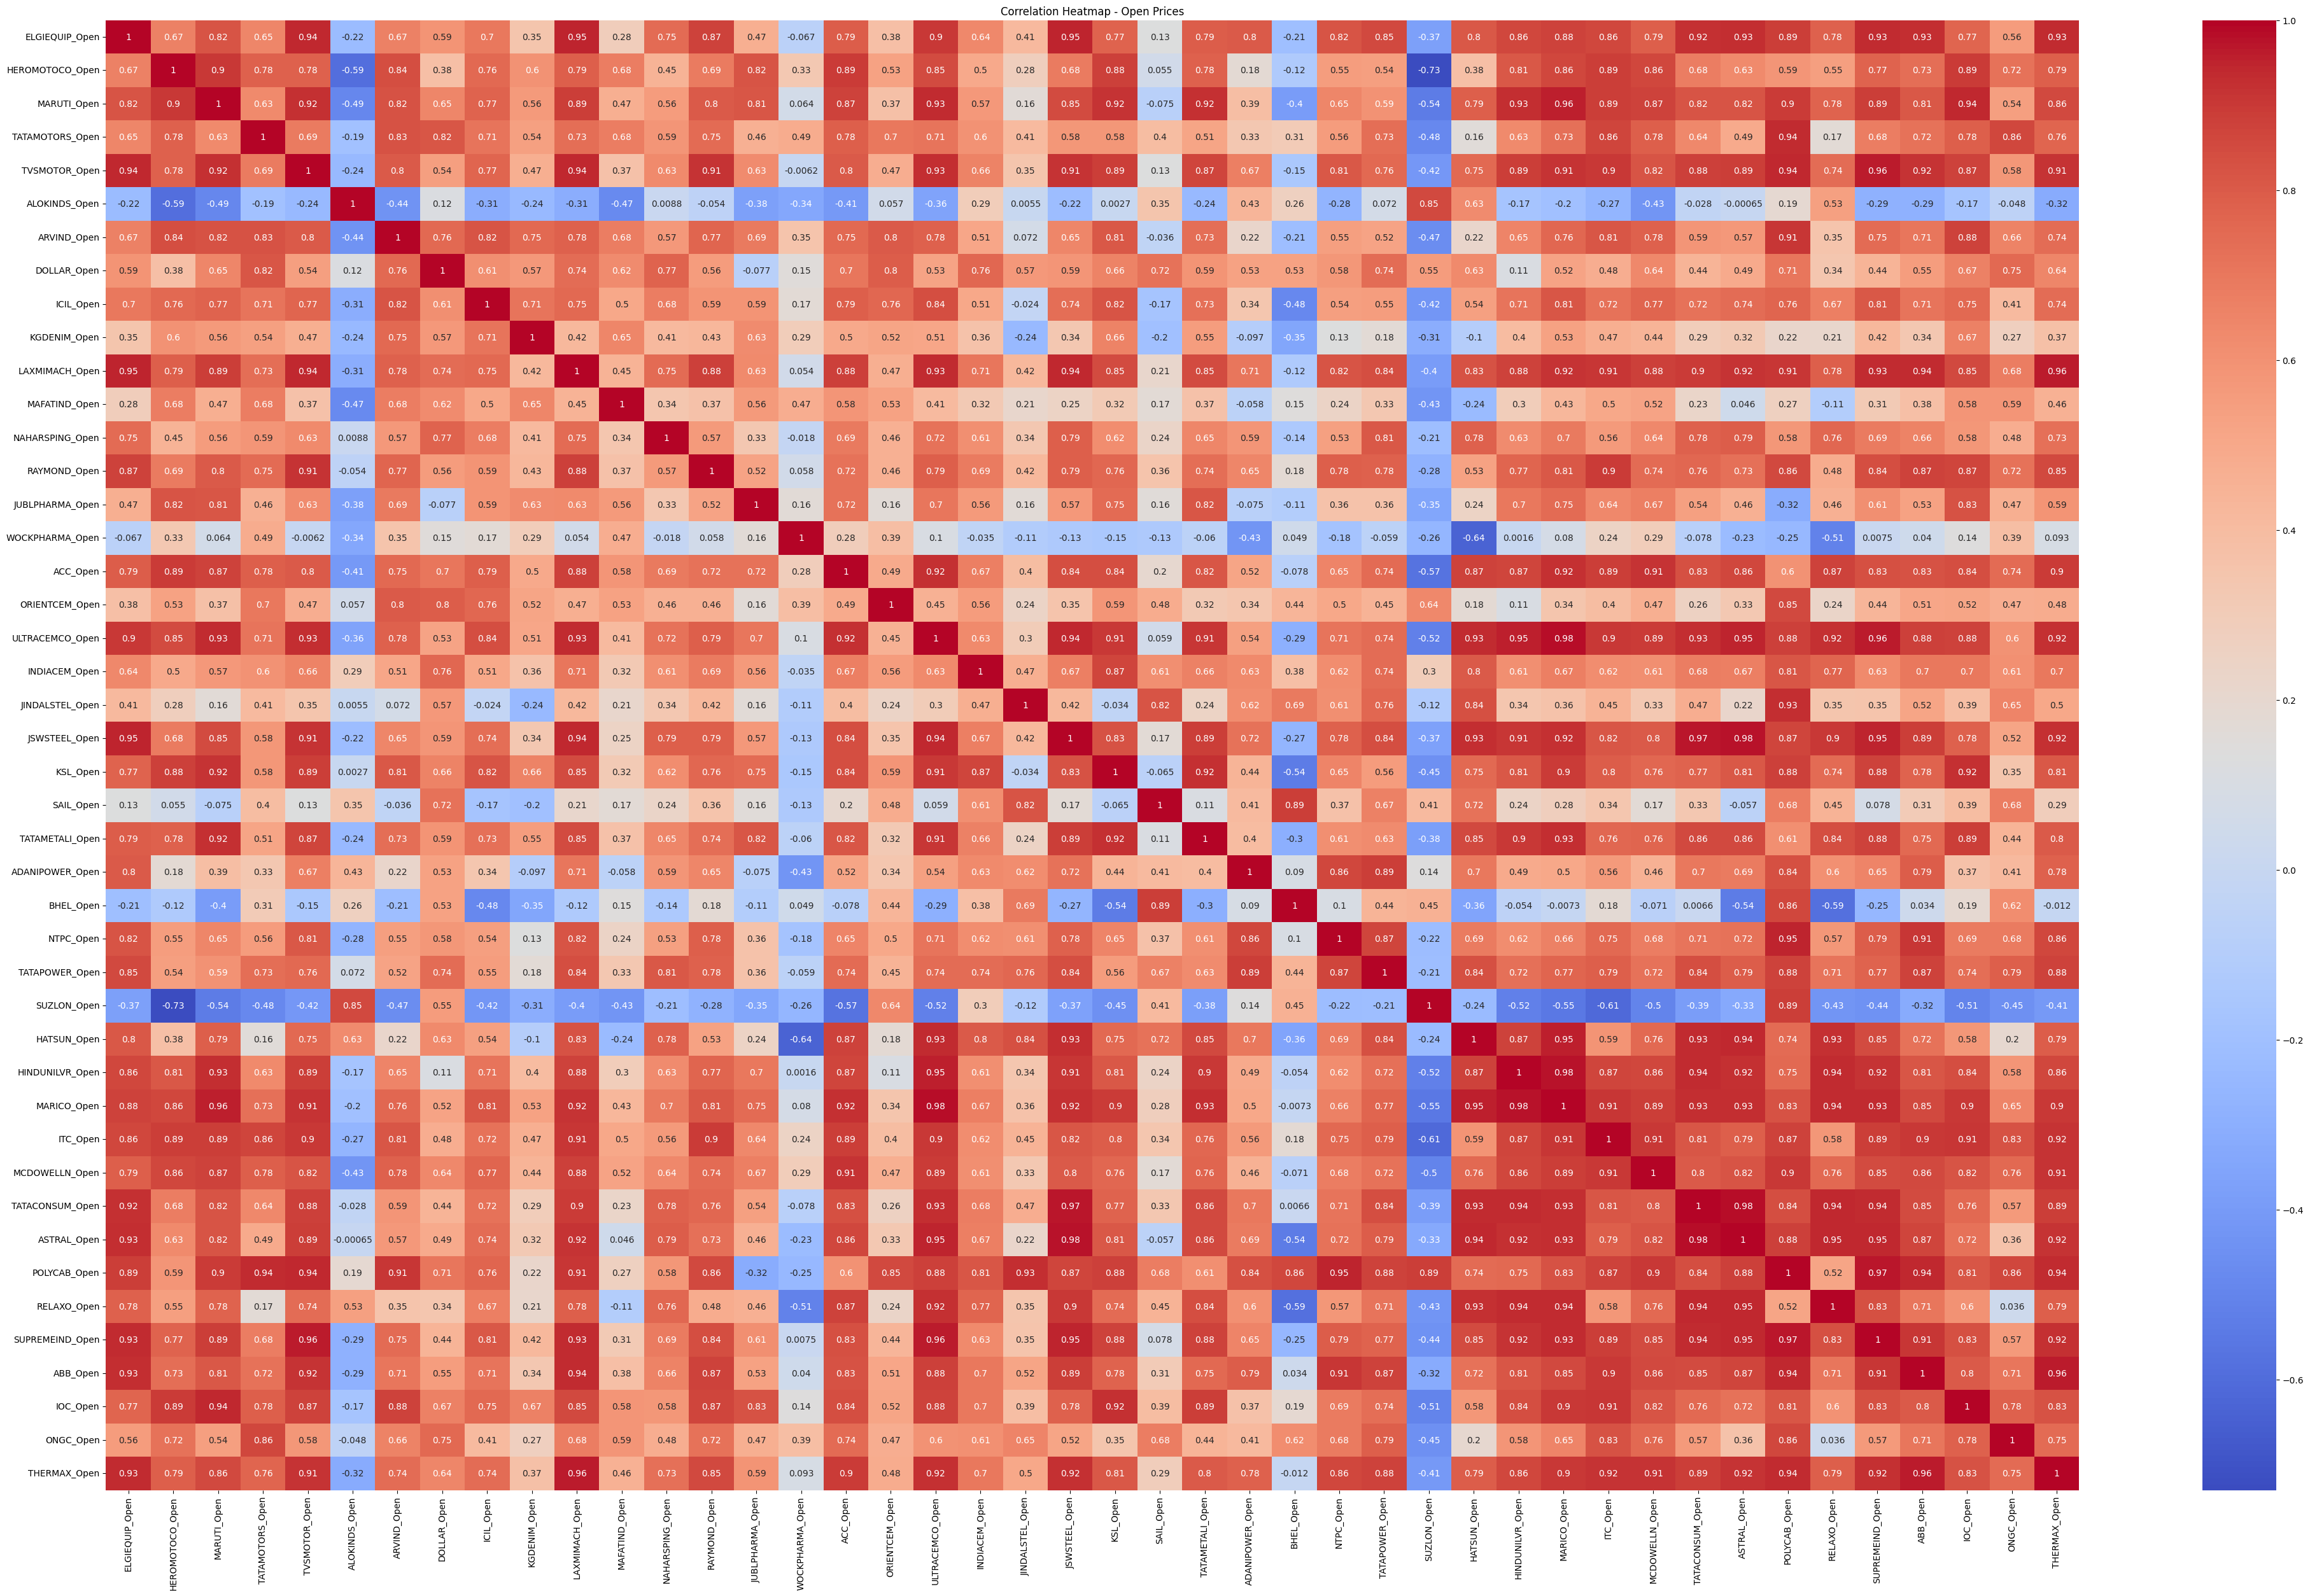

In [102]:
# Filter Open columns
open_cols = [col for col in merged_df.columns if 'Open' in col]
df_open = merged_df[open_cols]

# Calculate correlation
corr_open = df_open.corr()

# Plot heatmap
plt.figure(figsize=(50, 30))
sns.heatmap(corr_open, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Open Prices')
plt.savefig("corr-1.png")
plt.show()

In [108]:
# # Assuming the dataframes have been created and are named as follows:
# dataframes = [
#     df_elgiequip, df_heromotoco, df_maruti, df_tatamotors, df_tvsmotor,
#     df_alokinds, df_arvind, df_dollar, df_icil, df_kgdenim,
#     df_laxmimach, df_mafatlalind, df_naharsping, df_raymond, df_drreddy,
#     df_ipcalab, df_jublpharma, df_wockpharma, df_acc,
#     df_chettinad, df_orientcem, df_ultracemco, df_indiacem,
#     df_jindalstel, df_jswsteel, df_ksl, df_sail,
#     df_tatametali, df_adanipower, df_bhel, df_ntpc, df_tatapower,
#     df_suzlon, df_hatsun, df_hindunilvr, df_marico, df_itc,
#     df_mcdowelln, df_tataconsum, df_astral, df_polycab, df_relaxo,
#     df_supremeind, df_abb, df_ioc, df_ongc, df_thermax
# ]
# # Extracting the first and last index from each DataFrame
# start_dates = [df.index[0] for df in dataframes]
# end_dates = [df.index[-1] for df in dataframes]

# # Finding the latest start date and the earliest end date
# latest_start_date = max(start_dates)
# earliest_end_date = max(end_dates)

# print(f"Latest common start date: {latest_start_date}")
# print(f"Earliest common end date: {earliest_end_date}")


In [82]:
# # Filter each DataFrame for the common date range
# df_elgiequip_filtered = df_elgiequip.loc[latest_start_date:earliest_end_date]
# df_heromotoco_filtered = df_heromotoco.loc[latest_start_date:earliest_end_date]
# df_maruti_filtered = df_maruti.loc[latest_start_date:earliest_end_date]
# df_tatamotors_filtered = df_tatamotors.loc[latest_start_date:earliest_end_date]
# df_tvsmotor_filtered = df_tvsmotor.loc[latest_start_date:earliest_end_date]
# df_alokinds_filtered = df_alokinds.loc[latest_start_date:earliest_end_date]
# df_arvind_filtered = df_arvind.loc[latest_start_date:earliest_end_date]
# df_dollar_filtered = df_dollar.loc[latest_start_date:earliest_end_date]
# df_icil_filtered = df_icil.loc[latest_start_date:earliest_end_date]
# df_kgdenim_filtered = df_kgdenim.loc[latest_start_date:earliest_end_date]
# df_laxmimach_filtered = df_laxmimach.loc[latest_start_date:earliest_end_date]
# df_mafatlalind_filtered = df_mafatlalind.loc[latest_start_date:earliest_end_date]
# df_naharsping_filtered = df_naharsping.loc[latest_start_date:earliest_end_date]
# df_raymond_filtered = df_raymond.loc[latest_start_date:earliest_end_date]
# df_jublpharma_filtered = df_jublpharma.loc[latest_start_date:earliest_end_date]
# df_wockpharma_filtered = df_wockpharma.loc[latest_start_date:earliest_end_date]
# df_acc_filtered = df_acc.loc[latest_start_date:earliest_end_date]
# df_chettinad_filtered = df_chettinad.loc[latest_start_date:earliest_end_date]
# df_orientcem_filtered = df_orientcem.loc[latest_start_date:earliest_end_date]
# df_ultracemco_filtered = df_ultracemco.loc[latest_start_date:earliest_end_date]
# df_indiacem_filtered = df_indiacem.loc[latest_start_date:earliest_end_date]
# df_jindalstel_filtered = df_jindalstel.loc[latest_start_date:earliest_end_date]
# df_jswsteel_filtered = df_jswsteel.loc[latest_start_date:earliest_end_date]
# df_ksl_filtered = df_ksl.loc[latest_start_date:earliest_end_date]
# df_sail_filtered = df_sail.loc[latest_start_date:earliest_end_date]
# df_tatametali_filtered = df_tatametali.loc[latest_start_date:earliest_end_date]
# df_adanipower_filtered = df_adanipower.loc[latest_start_date:earliest_end_date]
# df_bhel_filtered = df_bhel.loc[latest_start_date:earliest_end_date]
# df_ntpc_filtered = df_ntpc.loc[latest_start_date:earliest_end_date]
# df_tatapower_filtered = df_tatapower.loc[latest_start_date:earliest_end_date]
# df_suzlon_filtered = df_suzlon.loc[latest_start_date:earliest_end_date]
# df_hatsun_filtered = df_hatsun.loc[latest_start_date:earliest_end_date]
# df_hindunilvr_filtered = df_hindunilvr.loc[latest_start_date:earliest_end_date]
# df_marico_filtered = df_marico.loc[latest_start_date:earliest_end_date]
# df_itc_filtered = df_itc.loc[latest_start_date:earliest_end_date]
# df_mcdowelln_filtered = df_mcdowelln.loc[latest_start_date:earliest_end_date]
# df_tataconsum_filtered = df_tataconsum.loc[latest_start_date:earliest_end_date]
# df_astral_filtered = df_astral.loc[latest_start_date:earliest_end_date]
# df_polycab_filtered = df_polycab.loc[latest_start_date:earliest_end_date]
# df_relaxo_filtered = df_relaxo.loc[latest_start_date:earliest_end_date]
# df_supremeind_filtered = df_supremeind.loc[latest_start_date:earliest_end_date]
# df_abb_filtered = df_abb.loc[latest_start_date:earliest_end_date]
# df_ongc_filtered = df_ongc.loc[latest_start_date:earliest_end_date]
# df_thermax_filtered = df_thermax.loc[latest_start_date:earliest_end_date]

In [80]:
# # Renaming columns for merging
# df_elgiequip_filtered.columns = [f"ELGIEQUIP_{col}" for col in df_elgiequip_filtered.columns]
# df_heromotoco_filtered.columns = [f"HEROMOTOCO_{col}" for col in df_heromotoco_filtered.columns]
# df_maruti_filtered.columns = [f"MARUTI_{col}" for col in df_maruti_filtered.columns]
# df_tatamotors_filtered.columns = [f"TATAMOTORS_{col}" for col in df_tatamotors_filtered.columns]
# df_tvsmotor_filtered.columns = [f"TVSMOTOR_{col}" for col in df_tvsmotor_filtered.columns]
# df_alokinds_filtered.columns = [f"ALOKINDS_{col}" for col in df_alokinds_filtered.columns]
# df_arvind_filtered.columns = [f"ARVIND_{col}" for col in df_arvind_filtered.columns]
# df_dollar_filtered.columns = [f"DOLLAR_{col}" for col in df_dollar_filtered.columns]
# df_icil_filtered.columns = [f"ICIL_{col}" for col in df_icil_filtered.columns]
# df_kgdenim_filtered.columns = [f"KGDENIM_{col}" for col in df_kgdenim_filtered.columns]
# df_laxmimach_filtered.columns = [f"LAXMIMACH_{col}" for col in df_laxmimach_filtered.columns]
# df_mafatlalind_filtered.columns = [f"MAFATIND_{col}" for col in df_mafatlalind_filtered.columns]
# df_naharsping_filtered.columns = [f"NAHARSPING_{col}" for col in df_naharsping_filtered.columns]
# df_raymond_filtered.columns = [f"RAYMOND_{col}" for col in df_raymond_filtered.columns]
# df_jublpharma_filtered.columns = [f"JUBLPHARMA_{col}" for col in df_jublpharma_filtered.columns]
# df_wockpharma_filtered.columns = [f"WOCKPHARMA_{col}" for col in df_wockpharma_filtered.columns]
# df_acc_filtered.columns = [f"ACC_{col}" for col in df_acc_filtered.columns]
# df_chettinad_filtered.columns = [f"CHETTINAD_{col}" for col in df_chettinad_filtered.columns]
# df_orientcem_filtered.columns = [f"ORIENTCEM_{col}" for col in df_orientcem_filtered.columns]
# df_ultracemco_filtered.columns = [f"ULTRACEMCO_{col}" for col in df_ultracemco_filtered.columns]
# df_indiacem_filtered.columns = [f"INDIACEM_{col}" for col in df_indiacem_filtered.columns]
# df_jindalstel_filtered.columns = [f"JINDALSTEL_{col}" for col in df_jindalstel_filtered.columns]
# df_jswsteel_filtered.columns = [f"JSWSTEEL_{col}" for col in df_jswsteel_filtered.columns]
# df_ksl_filtered.columns = [f"KSL_{col}" for col in df_ksl_filtered.columns]
# df_sail_filtered.columns = [f"SAIL_{col}" for col in df_sail_filtered.columns]
# df_tatametali_filtered.columns = [f"TATAMETALI_{col}" for col in df_tatametali_filtered.columns]
# df_adanipower_filtered.columns = [f"ADANIPOWER_{col}" for col in df_adanipower_filtered.columns]
# df_bhel_filtered.columns = [f"BHEL_{col}" for col in df_bhel_filtered.columns]
# df_ntpc_filtered.columns = [f"NTPC_{col}" for col in df_ntpc_filtered.columns]
# df_tatapower_filtered.columns = [f"TATAPOWER_{col}" for col in df_tatapower_filtered.columns]
# df_suzlon_filtered.columns = [f"SUZLON_{col}" for col in df_suzlon_filtered.columns]
# df_hatsun_filtered.columns = [f"HATSUN_{col}" for col in df_hatsun_filtered.columns]
# df_hindunilvr_filtered.columns = [f"HINDUNILVR_{col}" for col in df_hindunilvr_filtered.columns]
# df_marico_filtered.columns = [f"MARICO_{col}" for col in df_marico_filtered.columns]
# df_itc_filtered.columns = [f"ITC_{col}" for col in df_itc_filtered.columns]
# df_mcdowelln_filtered.columns = [f"MCDOWELLN_{col}" for col in df_mcdowelln_filtered.columns]
# df_tataconsum_filtered.columns = [f"TATACONSUM_{col}" for col in df_tataconsum_filtered.columns]
# df_astral_filtered.columns = [f"ASTRAL_{col}" for col in df_astral_filtered.columns]
# df_polycab_filtered.columns = [f"POLYCAB_{col}" for col in df_polycab_filtered.columns]
# df_relaxo_filtered.columns = [f"RELAXO_{col}" for col in df_relaxo_filtered.columns]
# df_supremeind_filtered.columns = [f"SUPREMEIND_{col}" for col in df_supremeind_filtered.columns]
# df_abb_filtered.columns = [f"ABB_{col}" for col in df_abb_filtered.columns]
# df_ioc_filtered.columns = [f"IOC_{col}" for col in df_ioc_filtered.columns]
# df_ongc_filtered.columns = [f"ONGC_{col}" for col in df_ongc_filtered.columns]
# df_thermax_filtered.columns = [f"THERMAX_{col}" for col in df_thermax_filtered.columns]

# # Merging all filtered dataframes on the Date index
# merged_df = pd.concat([
#     df_elgiequip_filtered, df_heromotoco_filtered, df_maruti_filtered, df_tatamotors_filtered, df_tvsmotor_filtered,
#     df_alokinds_filtered, df_arvind_filtered, df_dollar_filtered, df_icil_filtered, df_kgdenim_filtered,
#     df_laxmimach_filtered, df_mafatlalind_filtered, df_naharsping_filtered, df_raymond_filtered, df_jublpharma_filtered,
#     df_wockpharma_filtered, df_acc_filtered, df_chettinad_filtered, df_orientcem_filtered, df_ultracemco_filtered,
#     df_indiacem_filtered, df_jindalstel_filtered, df_jswsteel_filtered, df_ksl_filtered, df_sail_filtered,
#     df_tatametali_filtered, df_adanipower_filtered, df_bhel_filtered, df_ntpc_filtered, df_tatapower_filtered,
#     df_suzlon_filtered, df_hatsun_filtered, df_hindunilvr_filtered, df_marico_filtered, df_itc_filtered,
#     df_mcdowelln_filtered, df_tataconsum_filtered, df_astral_filtered, df_polycab_filtered, df_relaxo_filtered,
#     df_supremeind_filtered, df_abb_filtered, df_ioc_filtered, df_ongc_filtered, df_thermax_filtered
# ], axis=1)

# merged_df = merged_df.dropna(inplace=True)